# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 

Α/Α ομάδας: 39  
Ασημάκη Γεωργία Γρηγορία -- 03116197  
Μετζάκης Ιωάννης -- 03116202  
Σκούφης Πέτρος -- 03116141 

In [ ]:
import pandas as pd
import scipy as sp
import joblib
import numpy as np

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

## Εισαγωγή του Dataset

In [ ]:
'''
dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)
joblib.dump(df_data_1, 'df_data_1.pkl')
''';

In [ ]:
df_data_1 = joblib.load('df_data_1.pkl')

team_seed_number = 39

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο  

## Μετατροπή σε TFIDF

Αρχικά μετατρέπουμε το corpus σε αναπαράσταση tf-idf, χωρίς όμως να βελτιστοποιήσουμε τη συνάρτηση *TfidfVectorizer*

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)
vocab = vectorizer.vocabulary_


corpus_tf_idf_array = corpus_tf_idf.toarray()
print(corpus_tf_idf_array.shape)
vocab

(5000, 49148)


{'in': 21409,
 'the': 43801,
 'film': 16080,
 'director': 12347,
 'ross': 37292,
 'mcelwee': 27418,
 'gets': 17810,
 'married': 27028,
 'finally': 16116,
 'putting': 34597,
 'an': 2164,
 'end': 14369,
 'to': 44311,
 'his': 20196,
 'family': 15554,
 'worrying': 48404,
 'grandmother': 18455,
 'dies': 12175,
 'wife': 48008,
 'marilyn': 26938,
 'has': 19506,
 'miscarriage': 28254,
 'and': 2225,
 'father': 15701,
 'medical': 27572,
 'doctor': 12874,
 'suddenly': 42342,
 'within': 48220,
 'week': 47713,
 'of': 30697,
 'mother': 28852,
 'had': 19071,
 'died': 12169,
 'cancer': 6920,
 'ten': 43567,
 'years': 48688,
 'earlier': 13715,
 'so': 40641,
 'returns': 36633,
 'house': 20621,
 'where': 47874,
 'housekeeper': 20633,
 'ministers': 28178,
 'him': 20130,
 'about': 853,
 'christianity': 8252,
 'faith': 15495,
 'goes': 18163,
 'visit': 47118,
 'friend': 17052,
 'charleen': 7802,
 'who': 47949,
 'is': 22449,
 'now': 30380,
 'living': 25580,
 'alone': 1894,
 'new': 29938,
 'apartment': 2561,
 '

Παρατηρούμε πως το λεξιλόγιο που προκύπτει είναι αρκετά μεγάλο, πλήθους 49148 χαρακτηριστικών.

Στη συνέχεια υλοποιούμε τη συνάρτηση *content_recommender* και μέσω αυτής προσπαθούμε να βελτιστοποιήσουμε την *TfidVectorizer*. Για την υλοποίηση χρησιμοποιήσαμε την απόσταση συνημιτόνου.

In [ ]:
def content_recommender(target_movie, max_recommendations):
    
    distances = np.zeros((corpus_tf_idf.shape[0],2))

    for i in range(corpus_tf_idf_array.shape[0]):
            distances[i][0] = (sp.spatial.distance.cosine(corpus_tf_idf_array[i],corpus_tf_idf_array[target_movie]))
            distances[i][1] = i
    
    distances_sorted = np.array(sorted(distances, key= lambda x: x[0]))
    ID_sorted = distances_sorted[:,1]
    ID_sorted = np.delete(ID_sorted, 0)    #to 1o einai h target
    
    
    
    print("Ταινία Στόχος: ",'\n')
    print("ID: ", target_movie)
    print("Τίτλος: ", titles[target_movie])
    print("Σύνοψη: ", corpus[target_movie])
    print("Κατηγορίες: ", categories[target_movie], '\n\n\n')
    
    print("Συστάσεις:", '\n')
    
    for i in range(max_recommendations):
        ID = int(ID_sorted[i])
        
        print("%s."%(i+1))
        print("ID: ", ID)
        print("Τίτλος: ", titles[ID])
        print("Σύνοψη: ", corpus[ID])
        print("Κατηγορίες: ", categories[ID], '\n\n')

Για τη βελτιστοποίηση της συνάρτησης *TfidVectorizer*, η πρώτη σκέψη ήταν να εντοπίσουμε τις λέξεις, οι οποίες εμφανίζονται με μεγάλη συχνότητα στις περιλήψεις των ταινιών, αλλά στην ουσία δεν προσδίδουν τίποτα στο σημασιολογικό περιεχόμενό τους, και να τις προσθέσουμε στην παράμετρο "*stop_words*" της *TfidVectorizer*.

Αρχικά, χρησιμοποιήσαμε ως stop_words την έτοιμη λίστα text.ENGLISH_STOP_WORDS. Στο λεξιλόγιο που προέκυψε, προβάλαμε τα πρώτα 50 στοιχεία (ταξινομημένα σε φθίνουσα συχνότητα στο κείμενο), επιλέξαμε κάποιες λέξεις που θεωρήσαμε ότι δεν έχουν σχέση με το περιεχόμενο των ταινιών, και τις προσθέσαμε στη λίστα stop_words.

Οι λέξεις αυτές είναι οι εξής: 
*['film','director','gets','finally','end','goes','new','old','story','took','takes','access','accessed','review']*, καθώς και οι αριθμοί *['one', ..., 'ten']*.

Φυσικά και υπάρχουν αρκετές ακόμα λέξεις που μπορούν να προστεθούν στην παραπάνω λίστα, ωστόσο επιλέξαμε αυτές που εμφανίζονται περισσότερο στο συνολικό dataset.

Στη συνέχεια, μέσα από δοκιμές εστιάσαμε στις συστάσεις που είχαν σημασιολογικά μεγάλη διαφορά από την εκάστοτε ταινία-στόχο, και προσπαθήσαμε να εντοπίσουμε το λόγο που συμβαίνει αυτό.

Συγκεκριμένα, για τις ταινίες με ID=62, ID=1350, ID=1555 παρατηρήσαμε πως οι συστάσεις βασιζόταν κυρίως στο κοινό όνομα Chris, Lloyd και Hal αντίστοιχα.

In [ ]:
content_recommender(62,1)
content_recommender(1350,1)
content_recommender(1555,1)

Ταινία Στόχος:  

ID:  62
Τίτλος:  ['Munchie Strikes Back']
Σύνοψη:  Because of the repercussions left from his last adventure, Munchie must appear before a celestial court presided over by Kronus . The tribunal proceeds to blame Munchie for a number of historical calamities, including the sinking of Atlantis, the crash of the Hindenburg, the catacylism of Vesuvius, the meltdown of Chernobyl. As punishment, he is sentenced to help single mom Linda McClelland . Linda's son Chris  is the only one who can see Munchie, and Munchie and he become best buddies. Chris is the pitcher of a Little League team, and is being bullied by Brett Carlisle , who is his rival in baseball as well as for the attentions of the girl-next-door Jennifer . While out of town on a business trip, Linda's boss makes improper advances to her. When she refuses his advances, he fires her. This creates financial hardship on the family. Munchie intervenes in their lives, making it so Chris has a perfect game and impresse

Ταινία Στόχος:  

ID:  1555
Τίτλος:  ['2001: A Space Odyssey']
Σύνοψη:   The film consists of four major sections, all of which, except the second, are introduced by superimposed titles.   A tribe of herbivorous early hominids is foraging for food in the African desert. A leopard kills one member, and another tribe of man-apes drives them from their water hole. Defeated, they sleep overnight in a small exposed rock crater, and awake to find a black monolith has appeared in front of them. They approach it shrieking and jumping, and eventually touch it cautiously. Soon after, one of the man-apes ([[Daniel Richter  realizes how to use a bone as both a tool and a weapon, which they start using to kill prey for their food. Growing increasingly capable and assertive, they reclaim control of the water hole from the other tribe by killing its leader. Triumphant, the tribe's leader throws his weapon-tool into the air as the scene shifts  from the falling bone to an orbital satellite millions of

Για την επίλυση του συγκεκριμένου προβλήματος, αρχικά εξετάσαμε τη μείωση της διαστατικότητας.

Ωστόσο, ορισμένα ονόματα εμφανίζονται σε πολλές ταινίες, και ενώ η υπερβολική αύξηση της παραμέτρου "*min_df*" της *TfidVectorizer* μπορεί να έλυνε το πρόβλημα αυτό, θα δημιουργούσε άλλα προβλήματα, καθώς θα χάναμε λέξεις που όντως συνδέουν σημασιολογικά ένα μικρότερο σύνολο ταινιών. 

Συνεπώς, σκεφτήκαμε να προσθέσουμε ένα μεγάλο αριθμό μικρών ονομάτων στη λίστα stop_words.
Για το σκοπό αυτό, βρήκαμε ένα dataset με τα 5162 περισσότερο γνωστά ονόματα στα αγγλικά, και μετά από κατάλληλη επεξεργασία τα προσθέσαμε στη λίστα stop_words.

In [ ]:
data_names0 = pd.read_csv("us.csv")
data_names = data_names0.to_numpy()
names = []
for i in range(len(data_names)):
    names.append(data_names[i][0].lower())

numbers = ['one','two','three','four','five','six','seven','eight','nine','ten']
words = ['film','director','gets','finally','end','goes','new','old','story','took','takes','access','accessed','review']

my_stop_words = text.ENGLISH_STOP_WORDS.union(words).union(names).union(numbers)

vectorizer = TfidfVectorizer(stop_words=my_stop_words)
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)
vocab = vectorizer.vocabulary_

corpus_tf_idf_array = corpus_tf_idf.toarray()
print(corpus_tf_idf_array.shape)
vocab

(5000, 46518)


{'mcelwee': 25756,
 'married': 25405,
 'putting': 32626,
 'family': 14721,
 'worrying': 45819,
 'grandmother': 17469,
 'dies': 11542,
 'wife': 45449,
 'miscarriage': 26524,
 'father': 14866,
 'medical': 25906,
 'doctor': 12230,
 'suddenly': 40056,
 'week': 45185,
 'mother': 27091,
 'died': 11537,
 'cancer': 6555,
 'years': 46093,
 'earlier': 13024,
 'returns': 34614,
 'house': 19542,
 'housekeeper': 19554,
 'ministers': 26455,
 'christianity': 7788,
 'visit': 44613,
 'friend': 16148,
 'living': 24112,
 'apartment': 2399,
 'lived': 24102,
 'island': 21358,
 'abandoned': 749,
 'army': 2723,
 'husband': 19762,
 'worked': 45780,
 'restore': 34491,
 'estranged': 14045,
 'returning': 34613,
 'home': 19291,
 'trip': 42588,
 'finds': 15278,
 'set': 36863,
 'downstairs': 12510,
 'grand': 17454,
 'piano': 30765,
 'arson': 2781,
 'suicide': 40107,
 'cremated': 9802,
 'remains': 34066,
 'bag': 3591,
 'inside': 20814,
 'box': 5531,
 'tries': 42570,
 'rid': 34791,
 'bring': 5802,
 'brother': 5899,
 

Έπειτα, συνεχίζοντας την πειραματική διαδικασία εντοπισμού πιθανών σφαλμάτων, διαπιστώσαμε πως για την ταινία-στόχο με ID=1481 η μόνη σχέση της με την 2η σύσταση είναι η χρονολογία 2009, χωρίς όμως αυτή να σχετίζεται με το περιεχόμενο της ταινίας.

In [ ]:
content_recommender(1481,2)

Ταινία Στόχος:  

ID:  1481
Τίτλος:  ['Scared to Death']
Σύνοψη:  A monster stalks Los Angeles as a Bio-Engineered creature called a Syngenor  takes refuge in the city's sewer system and then hits the streets at night in search of human spinal fluid.Retromedia DVD Case, 2007. Last accessed: September 2009.
Κατηγορίες:  ['"Drama",  "Science Fiction",  "Horror"'] 



Συστάσεις: 

1.
ID:  3132
Τίτλος:  ['The Ape Man']
Σύνοψη:  Dr. James Brewster  and his colleague Dr. Randall ([[Henry Hall  are involved in a series of scientific experiments which have caused him to transform into an ape-man. In an attempt to obtain a cure Brewster believes that it will be necessary to inject himself with recently drawn human spinal fluid. When Randall refuses to help him by providing the fluid, Brewster and his captive gorilla must attempt to find an appropriate donor.
Κατηγορίες:  ['"Science Fiction",  "Horror",  "Creature Film"'] 


2.
ID:  1742
Τίτλος:  ['American Harmony']
Σύνοψη:  American Harmony pr

Αυτό μας οδηγεί στη σκέψη να αφαιρέσουμε όλα τα χαρακτηριστικά που αποτελούνται από ψηφία. 
Γνωρίζουμε το ρίσκο του να επηρεαστούν οι συστάσεις σε ταινίες που αυτό που τις συνδέει είναι η χρονολογία, όπως για παράδειγμα σχετικές με συγκεκριμένους πολέμους, ή ιστορικά γεγονότα. Παρόλα αυτά, θεωρήσαμε πως το κέρδος είναι μεγαλύτερο, καθώς αφαιρούνται όλα τα προβλήματα όπως του παραπάνω παραδείγματος (με το 2009), ενώ επίσης οι ταινίες που αναφέραμε είναι αρκετά πιθανό να συνδέονται και με άλλες λέξεις κλειδιά, όπως nazi, vietnam, κ.α.

Για την υλοποίηση λοιπόν, δημιουργήσαμε ξανά το αρχικό λεξιλόγιο, και τυπώσαμε τα στοιχεία ταξινομημένα αλφαβητικά, αφού τα ψηφία ταξινομούνται πριν από κάθε γράμμα. Εντοπίσαμε πως τα πρώτα 724 χαρακτηριστικά αποτελούνται από ψηφία, συνεπώς τα προσθέσαμε στη λίστα stop_words, όπου είναι και η τελική.

Παρακάτω, η διαδικασία υπολογισμού των πρώτων αυτών στοιχείων:

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)
vocab = vectorizer.vocabulary_

corpus_tf_idf_array = corpus_tf_idf.toarray()

ff = vectorizer.get_feature_names() #arithmoi oti na nai
first_feats0 = ff[:724]
first_feats = [x.lower() for x in first_feats0]
print(first_feats)
#joblib.dump(first_feats,'first_feats.pkl')

['00', '000', '00007693', '000th', '001', '005', '006', '007', '00am', '00pm', '01', '013', '02', '020102', '0253341531', '03', '03358', '04', '0449', '047', '049', '05', '052009', '05metropolis', '06', '07', '08', '0813513413', '08d', '09', '09079', '0document_id', '10', '100', '1000', '1001', '100m', '100percentent', '100th', '101', '1011', '101st', '102', '102558', '1029', '1030', '103rd', '104', '1040', '104a', '105', '106', '1065498', '107', '1074', '109', '10butcher', '10f', '10k', '10th', '11', '110', '111', '11285', '114', '115297', '1156', '116', '117', '118', '1186', '1187', '1196', '1199', '11th', '12', '120', '1205', '1206', '121', '1227', '123', '123telugu', '125', '125th', '12740', '128', '12rohmer', '12th', '13', '130', '130042', '131', '1313', '132', '132669', '133', '134', '135', '13516', '135a', '136', '136commentators', '1394', '13b', '13th', '14', '140', '1400', '1405', '1406', '1408', '1412', '141977', '1423', '1424', '1431', '14382', '147', '14726471', '1482', '14

['first_feats.pkl']

Έχοντας πλέον την τελική λίστα stop_words, μπορούμε να πειραματιστούμε με την παράμετρο "*min_df*" της *TfidVectorizer* για να μειώσουμε τη διαστατικότητα. 

Η συγκεκριμένη παράμετρος, όταν δεχθεί όρισμα έναν θετικό ακέραιο αριθμό n, λειτουργεί ως threshold, απορρίπτοντας όλες τις λέξεις που εμφανίζονται σε λιγότερες από n ταινίες του dataset.

Μετά από αρκετές δοκιμές, αποφασίσαμε να τη θέσουμε ίση με 5.

Η επιλογή του συγκεκριμένου αριθμού έγινε με βάση τα εξής:

Διαπιστώσαμε πως για χαμηλότερο min_df, μπορεί να είχαμε εξαιρετικά αποτελέσματα για μικρό αριθμό ζητούμενων συστάσεων, αφού θα υπολογιζόταν πολύ συγκεκριμένες λέξεις, όπως χαρακτήρες ή μέρη που υπάρχουν σε τριλογίες κλπ, ωστόσο για μεγαλύτερο αριθμό συστάσεων θα ξεφεύγαμε αρκετά από σημασιολογικής πλευράς.

Αντίστοιχα, για μεγαλύτερο min_df μπορεί να είχαμε μία πιο γενική, αλλά σταθερή συσχέτιση μεταξύ των συστάσεων, χάναμε όμως κάποιες συστάσεις που θεωρήσαμε ως απαραίτητες.


# Τελικό TFIDF

Παρακάτω βρίσκεται το τελικό TFIDF (12164 χαρακτηριστικά), όπως αυτό προέκυψε από τις επιλογές που εξηγήσαμε προηγουμένως.

<sub>\*Προφανώς μπορούμε να τρέξουμε κατευθείαν το παρακάτω cell. Όλα τα παραπάνω παρουσιάστηκαν απλά για να φανεί η διαδικασία που ακολουθήσαμε μέχρι να προκύψει το τελικό.</sub>

In [ ]:
first_feats = joblib.load('first_feats.pkl')

data_names0 = pd.read_csv("us.csv")
data_names = data_names0.to_numpy()
names = []
for i in range(len(data_names)):
    names.append(data_names[i][0].lower())

numbers = ['one','two','three','four','five','six','seven','eight','nine','ten']
words = ['film','director','gets','finally','end','goes','new','old','story','took','takes','access','accessed','review']

my_stop_words = text.ENGLISH_STOP_WORDS.union(words).union(names).union(numbers).union(first_feats)

vectorizer = TfidfVectorizer(stop_words=my_stop_words, min_df=5)
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)
vocab = vectorizer.vocabulary_

corpus_tf_idf_array = corpus_tf_idf.toarray()
print(corpus_tf_idf_array.shape)
vocab

(5000, 12164)


{'married': 6638,
 'putting': 8506,
 'family': 4105,
 'worrying': 12074,
 'grandmother': 4796,
 'dies': 3094,
 'wife': 11959,
 'miscarriage': 6867,
 'father': 4144,
 'medical': 6724,
 'doctor': 3325,
 'suddenly': 10583,
 'week': 11903,
 'mother': 6997,
 'died': 3093,
 'cancer': 1562,
 'years': 12134,
 'earlier': 3524,
 'returns': 9143,
 'house': 5316,
 'housekeeper': 5318,
 'ministers': 6848,
 'christianity': 1870,
 'visit': 11739,
 'friend': 4532,
 'living': 6383,
 'apartment': 486,
 'lived': 6377,
 'island': 5884,
 'abandoned': 2,
 'army': 590,
 'husband': 5370,
 'worked': 12057,
 'restore': 9097,
 'estranged': 3853,
 'returning': 9142,
 'home': 5235,
 'trip': 11291,
 'finds': 4265,
 'set': 9697,
 'downstairs': 3388,
 'grand': 4791,
 'piano': 7871,
 'suicide': 10601,
 'cremated': 2583,
 'remains': 8923,
 'bag': 852,
 'inside': 5679,
 'box': 1302,
 'tries': 11284,
 'rid': 9191,
 'bring': 1376,
 'brother': 1397,
 'successful': 10570,
 'practice': 8141,
 'talks': 10821,
 'death': 2786,


# Παραδείγματα καλής λειτουργίας του συστήματος συστάσεων

1. Για την ταινία με ID=1059, παρατηρούμε πως συνδέεται άμεσα με όλες τις συστάσεις, καθώς όλες περιέχουν zombies.

In [ ]:
content_recommender(1059,5)

Ταινία Στόχος:  

ID:  1059
Τίτλος:  ['Zombies! Zombies! Zombies!']
Σύνοψη:  Searching for the cure for cancer, a scientist creates a chemical that promotes cell growth. After being visited by a drug addict, the drugs and the cure are mixed up and misused by him and several prostitutes. They become zombified and begin biting people nearby. A small group of exotic dancers team up with the prostitutes' former pimp to defend their strip club, the Grindhouse, against a horde of blood-thirsty zombies. Four strippers in a nightclub, after their dance routines are over and the club is closing for the night, walk over to a nearby cafeteria for breakfast, when some hookers turn into zombies and attack them. Except for one stripper Pandora, played by Juliet Reeves, who couldn't make it till the end, the other 3 ladies manage to fight and decimate all the zombies and survive through it all. The prettiest and tallest of the 3 surviving strippers is Dakota, played by Playboy playmate Jessica Barton

2. Η την ταινία με ID=2351, συνδέεται με τις συστάσεις της μέσω της κοινής θεματικής των εξωγήινων.

In [ ]:
content_recommender(2351,5)

Ταινία Στόχος:  

ID:  2351
Τίτλος:  ['Aliens in the Attic']
Σύνοψη:  A meteor shower rockets through open space. Four glowing pods are seen hiding behind the meteor shower. Suddenly the meteor shower makes a hard right and heads towards a distant planet Earth. In a Chicago suburb, Stuart Pearson  and his wife Nina  head a family that includes 7-year-old Hannah ; 17-year-old sister Bethany , who's just returned from a secret outing with her boyfriend Ricky Dillman ([[Robert Hoffman , and 15-year-old techno-geek Tom  whose high school grades are low. Deciding the family needs some good old-fashioned togetherness, Stuart takes them to a holiday home in the middle of nowhere. Joining them is Uncle Nate , Nate's 14-year-old son Jake , Nana Rose , and identical 12-year-old twins Art  and Lee . Ricky also arrives unexpectedly and talks his way into staying overnight. That night dark storm clouds swirl around the house. Suddenly, the four glowing pods land on the roof. An alien crew emerges, 

3. Για την ταινία με ID=1120 (Tarzan), βλέπουμε πως αρχικά συστήνει όλες τις υπόλοιπες ταινίες με τον Tarzan, ενώ η 5η σύσταση συνδέεται μέσω της θεματικής των πιθήκων (ape man).

In [ ]:
content_recommender(1120,5)

Ταινία Στόχος:  

ID:  1120
Τίτλος:  ['Tarzan, the Ape Man']
Σύνοψη:   James Parker is a hunter in Africa, searching for a mythical "white ape." He is joined by his estranged daughter, Jane, after her mother's death. They discover the "white ape" is actually Tarzan, an uncivilized white man raised by apes living in the jungle. James continues to pursue Tarzan with the purpose of capturing him, dead or alive, and bringing him back to England. Realizing that James is on his trail, Tarzan kidnaps Jane. Jane and Tarzan become fascinated by each other. Jane is then kidnapped by natives who intend to make her a wife of the tribe leader, forcing Tarzan into action.
Κατηγορίες:  ['"Action/Adventure",  "Action",  "Adventure",  "Comedy"'] 



Συστάσεις: 

1.
ID:  620
Τίτλος:  ['Tarzan and the Slave Girl']
Σύνοψη:  Tarzan and Jane are spending some time by a river when they hear a scream. A local tribal girl has gone missing, and the tribes people believe this is due to some evil spirit. Tarzan a

4. Για την ταινία με ID=1555, βλέπουμε πως συνδέεται με όλες τις συστάσεις μέσω της θεματικής του διαστήματος και του πολέμου, ενώ όλες είναι ταινίες επιστημονικής φαντασίας.

In [ ]:
content_recommender(1555,5)

Ταινία Στόχος:  

ID:  1555
Τίτλος:  ['2001: A Space Odyssey']
Σύνοψη:   The film consists of four major sections, all of which, except the second, are introduced by superimposed titles.   A tribe of herbivorous early hominids is foraging for food in the African desert. A leopard kills one member, and another tribe of man-apes drives them from their water hole. Defeated, they sleep overnight in a small exposed rock crater, and awake to find a black monolith has appeared in front of them. They approach it shrieking and jumping, and eventually touch it cautiously. Soon after, one of the man-apes ([[Daniel Richter  realizes how to use a bone as both a tool and a weapon, which they start using to kill prey for their food. Growing increasingly capable and assertive, they reclaim control of the water hole from the other tribe by killing its leader. Triumphant, the tribe's leader throws his weapon-tool into the air as the scene shifts  from the falling bone to an orbital satellite millions of

5. Η ταινία με ID=62 συνδέεται με τις συστάσεις της μέσω της θεματικής του baseball.

In [ ]:
content_recommender(62,5)

Ταινία Στόχος:  

ID:  62
Τίτλος:  ['Munchie Strikes Back']
Σύνοψη:  Because of the repercussions left from his last adventure, Munchie must appear before a celestial court presided over by Kronus . The tribunal proceeds to blame Munchie for a number of historical calamities, including the sinking of Atlantis, the crash of the Hindenburg, the catacylism of Vesuvius, the meltdown of Chernobyl. As punishment, he is sentenced to help single mom Linda McClelland . Linda's son Chris  is the only one who can see Munchie, and Munchie and he become best buddies. Chris is the pitcher of a Little League team, and is being bullied by Brett Carlisle , who is his rival in baseball as well as for the attentions of the girl-next-door Jennifer . While out of town on a business trip, Linda's boss makes improper advances to her. When she refuses his advances, he fires her. This creates financial hardship on the family. Munchie intervenes in their lives, making it so Chris has a perfect game and impresse

6. Για την ταινία με ID=1137 (Scooby-Doo), παίρνουμε αρχικά ως συστάσεις τα υπόλοιπα Scooby-Doo, ενώ οι επόμενες συστάσεις συνδέονται μέσω της θεματικής των εξωγήινων.

In [ ]:
content_recommender(1137,5)

Ταινία Στόχος:  

ID:  1137
Τίτλος:  ['Scooby-Doo and the Alien Invaders']
Σύνοψη:  The Mystery Machine is driving through the Sonoran Desert. A sandstorm comes up and Shaggy makes an wrong turn onto government property. Seeing a UFO causes Shaggy to lose control of the vehicle and the gang find themselves on the outskirts of a small town. While Scooby and Shaggy stay with the van the rest of the gang enters a local diner to get directions. Shaggy and Scooby then see a mythical animal called a jackalope. The jackalope takes their last Scooby Snack and they chase it into a cave, where they encounter aliens. They run into the diner in panic, claiming to have seen aliens. The waitress, Dottie, says that they never see aliens but do see strange lights and hear sounds at night. The chef, Sergio, says that a month earlier local cattle vanished without a trace and a lot of people moved away. A man named Lester claims to have been abducted and he believes the two. He also claims to have pictur

7. Η ταινία με ID=2534 και οι συστάσεις της έχουν κοινή θεματική τα Χριστούγεννα.

In [ ]:
content_recommender(2534,5)

Ταινία Στόχος:  

ID:  2534
Τίτλος:  ['Father Christmas']
Σύνοψη:  Father Christmas centres around the prospect of what Santa does with himself "the other 364 days of the year", along with his annual delivery of presents to children around the world. The film starts with Father Christmas coming back from his annual Christmas Eve run, and relaxing in his home with his cat and dog. He then breaks the fourth wall, explaining that his unwinding is well deserved, contrary to popular belief. He cites the care of his reindeer, his garden, and shopping among others as activities that take up his time. Because of his strenuous lifestyle, he explains that in the past year he decided to take a holiday. In a flashback, it is shown that after bringing home brochures, and audibly considering Italy, Greece, Ireland, Holland, Canada, Germany, Tunisia, Switzerland, he finally settled on France. However, when he imagines all of the things he'll be able to do there , he decides on the need for a camper v

8. H ταινία με ID=1481 και οι συστάσεις της έχουν κοινή θεματική τα παράξενα πλάσματα-τέρατα.

In [ ]:
content_recommender(1481,5)

Ταινία Στόχος:  

ID:  1481
Τίτλος:  ['Scared to Death']
Σύνοψη:  A monster stalks Los Angeles as a Bio-Engineered creature called a Syngenor  takes refuge in the city's sewer system and then hits the streets at night in search of human spinal fluid.Retromedia DVD Case, 2007. Last accessed: September 2009.
Κατηγορίες:  ['"Drama",  "Science Fiction",  "Horror"'] 



Συστάσεις: 

1.
ID:  1878
Τίτλος:  ['Scooby-Doo and the Loch Ness Monster']
Σύνοψη:  The Mystery, Inc. gang travel to Loch Ness in Scotland to see the famous Blake Castle, the home of Daphne Blake's cousin, Shannon. The Castle grounds is home to the first annual Highland Games, composed of many traditional Scottish sports. But when they arrive Shannon informs them that the Castle had recently been terrorized by the Loch Ness Monster. Shannon says she has seen the monster and it is indeed real, a position shared by Del Chillman, a local Loch Ness Monster enthusiast and amateur cryptozoologist, and Professor Fiona Pembrooke, a

9. H ταινία με ID=2883 και οι συστάσεις της έχουν κοινή θεματική τις δολοφονίες.

In [ ]:
content_recommender(2883,5)

Ταινία Στόχος:  

ID:  2883
Τίτλος:  ['Blow Out']
Σύνοψη:  While in post-production on a low-budget exploitation film, Philadelphia sound technician Jack Terry  is told by his producer that he needs a more realistic sounding scream and better wind effects. After leaving the studio to record potential sound effects at a local park, he sees a car careen off the road and plunge into a nearby lake. Jack dives into the water to help, discovering a dead man and a young woman, still alive, trapped inside the submerged car. He pulls her to safety and accompanies her to a local hospital. Jack learns that the driver of the car was the governor ; the girl was an escort named Sally . Associates of the governor attempt to whitewash the incident by concealing that Sally was in the car, and they convince Jack to smuggle Sally out of the hospital with him. Jack listens to the audio tape he recorded of the accident, wherein he distinctly hears a gunshot just before the blow out that caused the accident

10. H ταινία με ID=4029 και οι συστάσεις της έχουν κοινή θεματική τα βαμπίρ, τον δράκουλα, το αίμα.

In [ ]:
content_recommender(4029,5)

Ταινία Στόχος:  

ID:  4029
Τίτλος:  ['Dracula']
Σύνοψη:  "Bistritz, Hungary May 1897". Natives in Transylvania seem afraid when they learn solicitor Jonathan Harker is going to Castle Dracula. Jonathan shows up, and finds the Count abrupt and impatient to get things done. He reacts very strongly to a photograph of Harker's fiancee Mina and her best friend Lucy. After rescuing Harker from the Brides, he forces Harker to write a letter saying that he will be staying in Transylvania for a month. Harker climbs down the castle wall and finds Dracula's coffin, but is attacked and knocked out by one of Dracula's gypsy servants before he can stake Dracula. They later throw him in the lower levels of the crypt, where the Brides attack Harker... The Demeter runs aground carrying only Dracula and the dead captain lashed to the wheel. Soon after, Lucy begins to fall ill. Her fiancee, Arthur Holmwood, is perplexed and calls in Dr. Van Helsing. The doctor begins to recognize what might be happening

Δοκιμάσαμε να κάνουμε και μία PCA, αλλά ενώ μειώθηκε αισθητά η διαστατικότητα (στα 3000 χαρακτηριστικά), δεν είχαμε βελτίωση των συστάσεων, αντιθλετως μάλιστα παρατηρήσαμε πολλά "άσχετα" αποτελέσματα.

In [ ]:
'''##PCA
from sklearn.decomposition import PCA

pca = PCA(0.97, whiten=True)
vocab_pca = pca.fit_transform(corpus_tf_idf_array)
vocab_pca.shape
''';

(5000, 3928)

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf_metz.pkl')

In [ ]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [ ]:
final_set.shape

(5000, 12489)

Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

Από τη στιγμή που θέλουμε να προσχωρήσουμε σε μείωση της διαστατικότητας θα μπορούσαμε να χρησιμοποιήσουμε την ανάλυση PCA επιλέγοντας να διατηρηθεί ένα μεγάλο ποσοστό της αρχικής διακύμανσης των δεδομένων. Προχωρήσαμε σε κάτι τέτοιο από το προηγούμενο μέρος της άσκησης μειώνοντας τη διαστατικότητα σε 3400 χαρακτηριστικά **ΑΛΛΑ** ελέγχοντας τις συστάσεις που παρήγαγε το σύστημά μας μετά την PCA παρατηρήσαμε πως υστερούν και επιλέξαμε για το λόγο αυτό να προχωρήσουμε με το dataset **ΧΩΡΙΣ** PCA.

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
!pip install --upgrade somoclu
!pip install --upgrade networkx
!pip install --upgrade plotly
# import sompoclu, matplotlib
import somoclu
import matplotlib 
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 6.0 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=420936 sha256=0a7334a2224d7a79c30175573a76dcf3e6c2e7ebb3c74318a0f4af7848b59e36
  Stored in directory: /root/.cache/pip/wheels/69/4c/18/b5f05a068134b3d70d4060a06d2cd9080fa21084dc876f51e3
Successfully built somoclu
     |████████████████████████████████| 13.2 MB 185 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.


Παρακάτω φαίνεται ένα παράδειγμα της διαδικασίας που ακολουθήσαμε για τη δημιουργία των χαρτών. Επιλέξαμε να αποθηκεύουμε τους χάρτες πριν κάνουμε το clustering, για να μπορούμε να πειραματιστούμε πάνω σε αυτό. Επίσης επιλέξαμε για το μεγαλύτερο μέρος να ασχοληθούμε με υποσύνολα των ταινιών (2000).

In [ ]:
n_columns, n_rows = 30,30
som = somoclu.Somoclu(n_columns, n_rows, maptype='planar',gridtype = 'rectangular',compactsupport=False)
data=build_final_set(doc_limit = 2000)
%time som.train(data,epochs=100)

CPU times: user 2h 35min 42s, sys: 15.2 s, total: 2h 35min 57s
Wall time: 1h 19min 33s


In [ ]:
joblib.dump(som, 'som_30.pkl')

['som_30.pkl']

In [ ]:
#Run cell to load an existing pickle
#som = joblib.load('som_30.pkl')
som = joblib.load('som25_full.pkl')


## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [ ]:
bmus = som.bmus
print(bmus.shape)
#monadika bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus)
print(indices)

(5000, 2)
[[ 0  0]
 [ 0  1]
 [ 0  2]
 [ 0  3]
 [ 0  4]
 [ 0  6]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 0 10]
 [ 0 12]
 [ 0 13]
 [ 0 14]
 [ 0 15]
 [ 0 16]
 [ 0 17]
 [ 0 18]
 [ 0 19]
 [ 0 20]
 [ 0 21]
 [ 0 22]
 [ 0 23]
 [ 0 24]
 [ 1  0]
 [ 1  1]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  9]
 [ 1 10]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 15]
 [ 1 18]
 [ 1 20]
 [ 1 22]
 [ 1 23]
 [ 1 24]
 [ 2  0]
 [ 2  1]
 [ 2  2]
 [ 2  3]
 [ 2  4]
 [ 2  5]
 [ 2  7]
 [ 2  8]
 [ 2  9]
 [ 2 10]
 [ 2 12]
 [ 2 13]
 [ 2 16]
 [ 2 18]
 [ 2 19]
 [ 2 20]
 [ 2 21]
 [ 2 22]
 [ 2 23]
 [ 2 24]
 [ 3  0]
 [ 3  2]
 [ 3  3]
 [ 3  4]
 [ 3  6]
 [ 3  8]
 [ 3 10]
 [ 3 13]
 [ 3 14]
 [ 3 15]
 [ 3 17]
 [ 3 18]
 [ 3 19]
 [ 3 20]
 [ 3 21]
 [ 3 22]
 [ 3 23]
 [ 3 24]
 [ 4  0]
 [ 4  1]
 [ 4  2]
 [ 4  3]
 [ 4  5]
 [ 4  6]
 [ 4  7]
 [ 4  8]
 [ 4  9]
 [ 4 10]
 [ 4 11]
 [ 4 12]
 [ 4 13]
 [ 4 14]
 [ 4 15]
 [ 4 17]
 [ 4 19]
 [ 4 20]
 [ 4 21]
 [ 4 22]
 [ 4 23]
 [ 4 24]
 [ 5  1]
 [ 5  2]
 [ 5  3]
 [ 5  5]
 [ 5  6]
 [ 5  7]
 [ 5  9]
 [ 5 15]
 [ 5 17]



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters=35)
som.cluster(algorithm=algorithm)

#joblib.dump(som, 'som.pkl')


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.



## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



Παρακάτω ακολουθεί η υλοποίησή μας για το συγκεκριμένο τμήμα.

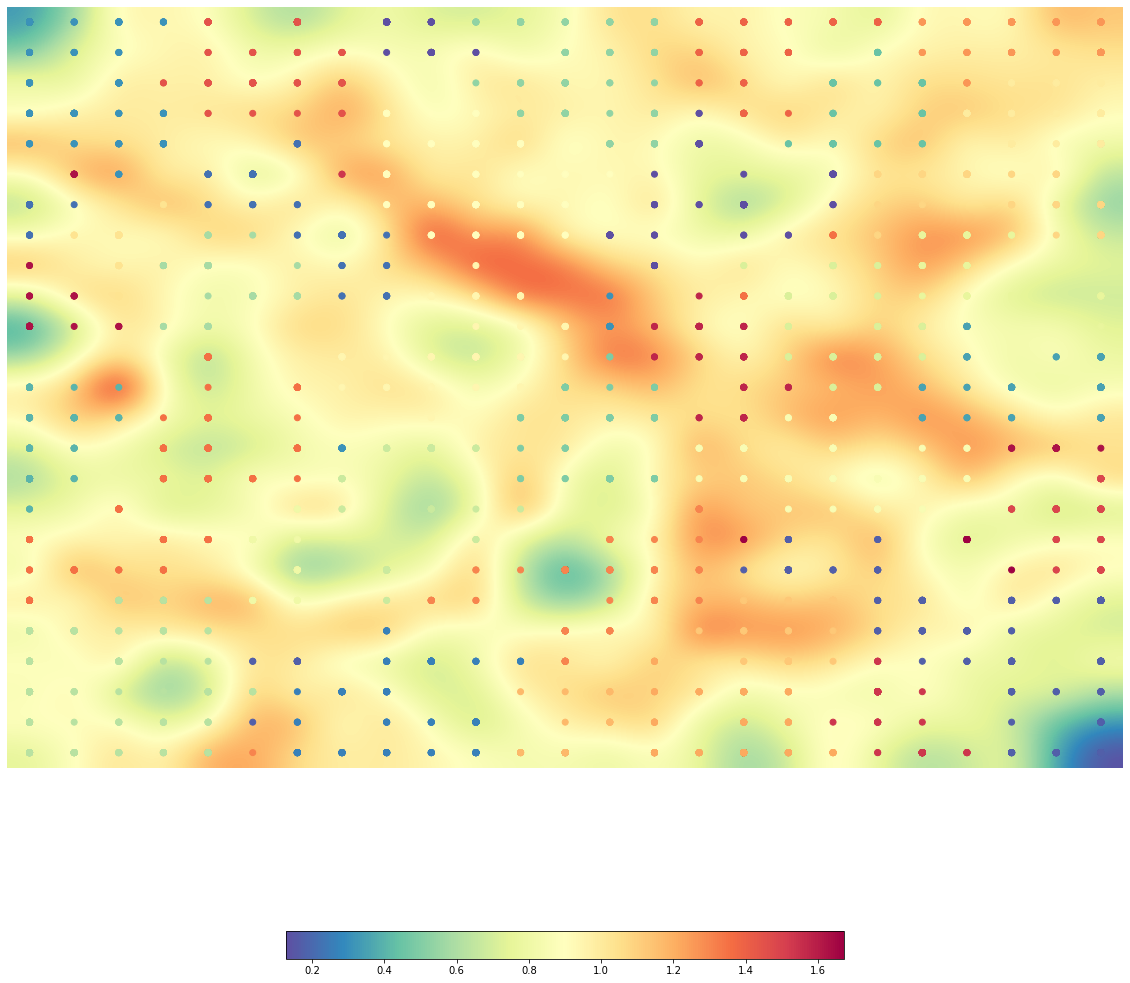

[[ 4  4  4  4 29 29 29  1  0  0  9  9  9  9  9 28 28 28 28 28 25 25 25 25
  25]
 [ 4  4  4 29 29 29 29 29  0  0  0  9  9  9  9 28 28 28 28  7 25 25 25 25
  25]
 [ 4  4  4 29 29 29 29 29 29 17  9  9  9  9  9 28 28 28  7  7  7 25 19 19
  19]
 [ 4  4  4  4 29 29 29 29 17 17 17  9  9  9  9  0 28 28  7  7  7 19 19 19
  19]
 [ 4  4  4  4  4  2  2 31 17 17 17 17  9  9  9  0  0  7  7  7  7 19 19 19
  19]
 [ 2 33  4  4  2  2  2 31 17 17 17 17 17 17  0  0  0  0  0 21 21 21 21 21
  21]
 [ 2  2 20 20  2  2  2  2 17 17 17 17 17 17  0  0  0  0  0 21 21 21 21 21
  21]
 [ 2 20 20 20 10 10  2  2  2 17 17 17 17  0  0  0  0  0 27 21 14 14 14 21
  21]
 [33 20 20 10 10 10 10  2  2 18 18 17  0  0  0  0 13 13 13 13 14 14 14 14
  14]
 [33 33 20 10 10 10 10  2  2 18 18 18 18  4  0 32 27 13 13 13 14 14 14 14
  14]
 [33 33 33 10 10 10 10 18 18 18 18 18 18  4 32 32 32 13 13 13 13  5 14 14
  14]
 [33 33 33 27 27 27 18 18 18 18 18 18 18  8 32 32 32 13 13 13 13  5  5  5
   5]
 [ 6  6  6 27 27 27 27 18 18 18 18 18  8

In [ ]:
from numpy import argsort,unique
som.view_umatrix(bestmatches=True,figsize=(20,20),colorbar=True)
print(som.clusters)
cl, i ,count= unique(som.clusters,return_inverse=True,return_counts=True)
print("Clusters sorted by increasing number of neurons")
print("Cluster index")
print("Number of neurons")
sorted=argsort(count)
a=np.zeros((2,25),dtype=int)
for j in range(25):
  a[0][j]=sorted[j]
  a[1][j]=count[sorted[j]]
print(a)


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

Παρακάτω ακολουθεί η υλοποίησή μας για τις συναρτήσεις της εκφώνησης. Σημειώνεται πως αυτές είναι τροποποιημένες ώστε είτε να τυπώνουν πληροφορίες είτε να επιστρέφουν πληροφορίες για χρήση από άλλες συναρτήσεις. 

In [ ]:
from numpy import ravel
from numpy import split

def print_categories_stats(movie_ids=[], printer = True):
    allCategories=[]
    for i in range(len(movie_ids)):
        ID=movie_ids[i]
        c=np.array2string(categories[ID])
        c=c.translate({ord("'"): None})
        #print(c,'\n')
        cat=c.split(', ')
        #print(cat,'\n')
        for j in range(len(cat)):
            x=cat[j]
            y=x.strip()
            y=y.translate({ord('['): None})
            #y=y.translate({ord('\\'): ""})
            cat[j]=y.translate({ord(']'): None})
        #print(cat, '\n\n\n')
        allCategories.extend(cat)
    clust, index, freq = np.unique(allCategories,return_inverse=True,return_counts=True)
    #sort = np.argsort(freq)
    #s = sort[::-1]
    #z = zip(clust[s],freq[s])
    #print(set(z))
    
    z = zip(clust,freq)
    zipped=list(z)
    zipped.sort(key = lambda x: x[1], reverse=True)
    if printer == True:
      print(zipped)
    else:
      return zipped[:3] 

In [ ]:
def print_cluster_neurons_movies_report(cluster_id, printer = True):
  x, y = np.where(som.clusters == cluster_id)
  coord = np.column_stack((y,x))
  neurons_idx = [] 
  for row in coord:
    new_neuron = np.where(np.all(ubmus == row, axis=1))
    if new_neuron[0].shape[0] == 1:
      neurons_idx.extend(new_neuron[0])
  if printer == True : 
    neuron_movies_report(neurons_idx)
  else:
    return neurons_idx , coord


In [ ]:
def neuron_movies_report(neurons, printer = True):
  movies = []
  for n in neurons: 
    idx = np.where(indices == n)
    movies.extend(idx[0].tolist())
  #print(len(movies))
  if printer == True:
    print_categories_stats(movies)
  else: 
    return movies

In [ ]:
print_cluster_neurons_movies_report(14)

[('"Animation"', 104), ('"Short Film"', 52), ('"Anime"', 21), ('"Japanese Movies"', 19), ('"Action"', 18), ('"Comedy film"', 15), ('"Fantasy"', 12), ('"Science Fiction"', 12), ('"World cinema"', 7), ('"Computer Animation"', 6), ('"Children\\s"', 5), ('"Children\\s/Family"', 5), ('"Action/Adventure"', 4), ('"Musical"', 4), ('"Adventure"', 3), ('"Comedy"', 3), ('"Drama"', 3), ('"Horror"', 3), ('"Thriller"', 3), ('"Children\\s Entertainment"', 2), ('"Chinese Movies"', 2), ('"Family Film"', 2), ('"Holiday Film"', 2), ('"Martial Arts Film"', 2), ('"Music"', 2), ('"Superhero movie"', 2), ('"Animated cartoon"', 1), ('"Christmas movie"', 1), ('"Coming of age"', 1), ('"Family-Oriented Adventure"', 1), ('"Fantasy Adventure"', 1), ('"Historical Epic"', 1), ('"Monster"', 1), ('"Mystery"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Romance Film"', 1), ('"Stop motion"', 1), ('"Superhero"', 1), ('"Television movie"', 1)]


Η παρακάτω συνάρτηση αποτελεί ένα τρόπο για συμπαγή ανάλυση των χαρακτηριστικών του κάθε cluster και γρήγορη επισκόπηση σημαντικών πληροφοριών, όπως οι νευρώνες που ανατέθηκαν στον cluster και η συχνότητα εισόδου.

In [ ]:
def total_cluster_comp(total_clusters):
  clust_lst = [] 
  for i in range(total_clusters):
    clust_neurons, _ = print_cluster_neurons_movies_report(i, False)
    clust_movies = neuron_movies_report(clust_neurons, False)
    clust_top_features = print_categories_stats(clust_movies, False)
    clust_lst.append([i, len(clust_neurons), len(clust_movies), clust_top_features])
  df = pd.DataFrame(clust_lst, columns = ['Cluster ID','Total Neurons','Total Movies','Top 3 Categories'])
  return df

In [ ]:
test = total_cluster_comp(25)

In [ ]:
test

Cluster ID  ...                                   Top 3 Categories
0            0  ...  [("Thriller", 180), ("Drama", 63), ("Psycholog...
1            1  ...  [("Drama", 604), ("Indie", 50), ("Comedy film"...
2            2  ...  [("Black-and-white", 145), ("Comedy", 112), ("...
3            3  ...  [("Drama", 201), ("Romantic drama", 201), ("Ro...
4            4  ...   [("Comedy", 320), ("Parody", 53), ("Indie", 32)]
5            5  ...  [("Animation", 124), ("Family Film", 109), ("S...
6            6  ...  [("Documentary", 135), ("Biography", 19), ("Cu...
7            7  ...  [("Action", 66), ("Thriller", 65), ("Action/Ad...
8            8  ...  [("Drama", 101), ("Comedy", 100), ("Romance Fi...
9            9  ...  [("Crime Fiction", 147), ("Thriller", 146), ("...
10          10  ...  [("Silent film", 71), ("Black-and-white", 57),...
11          11  ...  [("Horror", 352), ("Thriller", 83), ("Science ...
12          12  ...  [("Romance Film", 106), ("Comedy", 33), ("Come...
13          13  ...  [("Family Film", 79), ("Adventure", 77), ("Fan...
14          14  ...  [("Animation", 104), ("Short Film", 52), ("Ani...
15          15  ...  [("Comedy film", 73), ("Crime Fiction", 8), ("...
16          16  ...  [("Drama", 80), ("Family Film", 78), ("Family ...
17          17  ...  [("Thriller", 122), ("Mystery", 118), ("Drama"...
18          18  ...  [("Romantic comedy", 130), ("Comedy", 128), ("...
19          19  ...  [("Drama", 112), ("Action", 108), ("Action/Adv...
20          20  ...  [("Black-and-white", 36), ("Silent film", 36),...
21          21  ...  [("Action", 120), ("Adventure", 38), ("Science...
22          22  ...  [("Drama", 37), ("War film", 25), ("Period pie...
23          23  ...  [("Romance Film", 49), ("World cinema", 48), (...
24          24  ...  [("World cinema", 184), ("Drama", 171), ("Boll...

[25 rows x 4 columns]

Παρακάτω ακολουθούν βοηθητικές συναρτήσεις που έχουν ως στόχο την οπτικοποίηση του γράφου γειτνίασης των clusters.

In [ ]:
def get_neighbors_neuron(x,y):
  neighbors_arr = som.clusters[(x-1):(x+2),(y-1):(y+2)]
  neighbors = np.unique(neighbors_arr)
  return neighbors.tolist()

In [ ]:
def get_neighbors_cluster(id):
  cluster_neighbors = set([])
  _,neurons = print_cluster_neurons_movies_report(id, False)
  for n in neurons:
    n_set = set(get_neighbors_neuron(n[1],n[0]))
    cluster_neighbors = cluster_neighbors.union(n_set)
  return list(cluster_neighbors)

In [ ]:
def get_neighbors_list(total_clusters):
  neighbors = []
  for i in range(total_clusters):
    cluster_neighbors = get_neighbors_cluster(i)
    neighbors.append(cluster_neighbors)
  return neighbors

In [ ]:
def plot_topology0(total_clusters):
  G = nx.Graph()
  G.add_nodes_from([i for i in range(total_clusters)])
  neighbors = get_neighbors_list(total_clusters)
  for i in range(len(neighbors)):
    for j in neighbors[i]:
      G.add_edge(i,j)
  plt.figure(figsize= (20,20))
  plt.subplot(111)
  nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
test = total_cluster_comp(35)

In [ ]:
top3 = test['Top 3 Categories'].to_list()

top3final = []
for i in range(len(top3)):
    top3final.append(top3[i][0][0]+','+top3[i][1][0]+','+top3[i][2][0])
top3 = top3final
#print(top3)

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

#import plotly.offline as pyo
#pyo.init_notebook_mode(connected=False)    


def plot_topology(total_clusters,top3):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(total_clusters)])
    neighbors = get_neighbors_list(total_clusters)
    for i in range(len(neighbors)):
        for j in neighbors[i]:
            if (i!=j):
                G.add_edge(i,j)
    
    pos = nx.spring_layout(G, k=0.5)
    nx.set_node_attributes(G,pos,'pos')
    
    edge_x = []
    edge_y = []
    xtext=[]
    ytext=[]
    for edge in G.edges():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        xtext.append((x0+x1)/2)
        ytext.append((y0+y1)/2)
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        showlegend=False,
        line=dict(width=0.5, color='#888'),
        hoverinfo='text',
        mode='lines', 
        xaxis='x2', yaxis='y2')
    
    connections_trace = go.Scatter(x=xtext,y= ytext, 
        mode='markers',          
        hoverinfo='text',
        showlegend=False,
        marker=dict(
            showscale=False,
            colorscale='Greys',
            reversescale=False,
            color=[],
            size=0.2),
            xaxis='x2', yaxis='y2')
    

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='text',
        showlegend=False,
        marker=dict(
            showscale=False,
            colorscale='YlGnBu',
            reversescale=True,
            color='darkviolet',
            size=20,
            line_width=2), 
            xaxis='x2', yaxis='y2')
    
    
    node_adjacencies = []
    node_text = []
    node_t = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(7)
        node_text.append(top3[node])
        node_t.append(node)
            
    node_trace.marker.color = node_adjacencies
    node_trace.text = node_t
    node_trace.hovertext = node_text

    edges_connected = []
    for edges in G.edges():
        edges_connected.append('%s --- %s' %(top3[edges[0]],top3[edges[1]]))
    connections_trace.text = edges_connected
    
    
    
    

    fig = make_subplots(
        rows=1, cols=2,
        column_widths=[0.7, 0.5],
        shared_yaxes=True,
        horizontal_spacing = 0.005,
        specs=[[{"secondary_y": True}, {'type':'table'}]]
    )
    
    fig.add_trace(edge_trace, row=1, col=1)
    fig.add_trace(node_trace, row=1, col=1)
    fig.add_trace(connections_trace, row=1, col=1)

    fig.add_trace(go.Table(
        columnwidth = [1,5],
        header=dict(
            values=["Number", "TOP 3"],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[[i for i in range(len(top3))],[top3[i] for i in range(len(top3))]],
            align = "left")), row=1,col=2)
    
    fig.update_layout(height=600, width=1200)
                    
    
    fig.show()
    #pyo.plot(fig)


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.




## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.



Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


### Εισαγωγή στον τρόπο ανάλυσης

Αφού ολοκληρώσαμε τη διαδικασία της εκπαίδευσης και του clustering, επιλέξαμε να προβάλουμε τα αποτελέσματα με δύο διαφορετικούς τρόπους οπτικοποίησης, πέραν του `u_matrix` που υπάρχει στη βιβλιοθήκη. 

Η **πρώτη** οπτικοποίηση χρησιμοποιεί τη βιβλιοθήκη `pandas` με την οποία προβάλουμε ένα `DataFrame` που περιέχει σημαντικές πληροφορίες για τα clusters που δημιούργησε ο αλγόριθμός μας. Συγκεκριμένα προβάλουμε:

* `Cluster ID` : το χαρακτηριστικό αριθμό που αντιστοιχεί στο κάθε cluster.
* `Total Neurons` : το σύνολο σε πλήθος των νευρώνων που έχουν ανατεθεί σε αυτό το cluster.
* `Total Movies` : το σύνολο των ταινιών που κατηγοριοποιήθηκαν τελικά σε αυτό το cluster.
* `Top 3 Categories` : τους τίτλους των 3 κορυφαίων κατηγοριών που ανατέθηκαν στο συγκεκριμένο cluster, όσον αφορά τη συχνότητα εμφάνισής τους.

Η **δεύτερη** οπτικοποίηση χρησιμοποιεί τις βιβλιοθήκες `networkx` και `plotly` . Στόχος της οπτικοποίησης είναι η απεικόνιση των clusters σε μορφή γράφου, ώστε να γίνουν πιο εμφανείς οι σχέσεις γειτνίασης μεταξύ τους. 

Με τη `networkx` δημιουργούμε έναν απλό γράφο, όπου ο κάθε κόμβος αντιστοιχεί σε ένα cluster, του οποίου την ετικέτα και φέρει. Η ύπαρξη ακμής μεταξύ δύο κόμβων σηματοδοτεί τη γειτνίαση αυτών των δύο κόμβων. Η βιβλιοθήκη αυτή μας επιτρέπει μια πρώτη οπτικοποίηση, δε συγκεντρώνει όμως μεγάλο βαθμό πληροφορίας και συνίσταται η χρήση της σε συνδυασμό με το `pandas` Dataframe που αναπτύξαμε παραπάνω.

Αντίθετα, η υλοποίησή μας με χρήση της **διαδραστικής** `plotly` μάς επιτρέπει να λάβουμε επιπλέον πληροφορίες από το γράφο πέρα από αυτές της `networkx`. Με την επέκταση αυτή λοιπόν έχουμε τη δυνατότητα:
* Να δούμε άμεσα τις `'Top 3 Categories'` του συγκεκριμένου cluster, κάνοντας **hover** το ποντίκι μας πάνω από ένα συγκεκριμένο node.
* Να κάνουμε zoom-in σε ένα συγκεκριμένο τμήμα του γράφου, λειτουργία πολύ χρήσιμη σε περιπτώσεις με πολλά clusters.

Ο λόγος που τελικά χρησμιποιήσαμε και τις δύο ενώ φανερά η δεύτερη υλοποίηση του γράφου είναι καλύτερη είναι η έλλειψη δυνατότητας αποθήκευσης της κατάστασης των γραφημάτων της `plotly` από το notebook, με εξαίρεση την εισάγωγή τους μέσω `HTML`

### Πειραματισμός και Συμπεράσματα στο SOM Clustering

In [ ]:
from numpy import argsort,unique
import numpy as np
from sklearn.cluster import KMeans

def som_algorithm(som,clusters):
    algorithm = KMeans(n_clusters=clusters)
    som.cluster(algorithm=algorithm)
    som.view_umatrix(bestmatches=True,figsize=(20,20),colorbar=True)
    print(som.clusters)
    cl, i ,count= unique(som.clusters,return_inverse=True,return_counts=True)
    print("Clusters sorted by increasing number of neurons")
    print("Cluster index")
    print("Number of neurons")
    sorted=argsort(count)
    a=np.zeros((2,10),dtype=int)
    for j in range(10):
        a[0][j]=sorted[j]
        a[1][j]=count[sorted[j]]
    print(a)

Αρχικά, θα κατασκευάσουμε μικρούς χάρτες SOΜ σε ένα δείγμα 1000 ταινιών, διαστάσεων 10 Χ 10, και 15 clusters στον Κ-means, δοκιμάζοντας διαφορετικές παραμέτρους για την εκπαίδευση του SOM.

Συγκεκριμένα, θα πειραματιστούμε με τις παραμέτρους "*maptype*" και "*compactsupport*", διατηρώντας την παράμετρο `gridtype = 'rectangular'`, αφού για `gridtype = 'hexagonial'` δεν μπορούσαμε να εξάγουμε χρήσιμα συμπεράσματα.

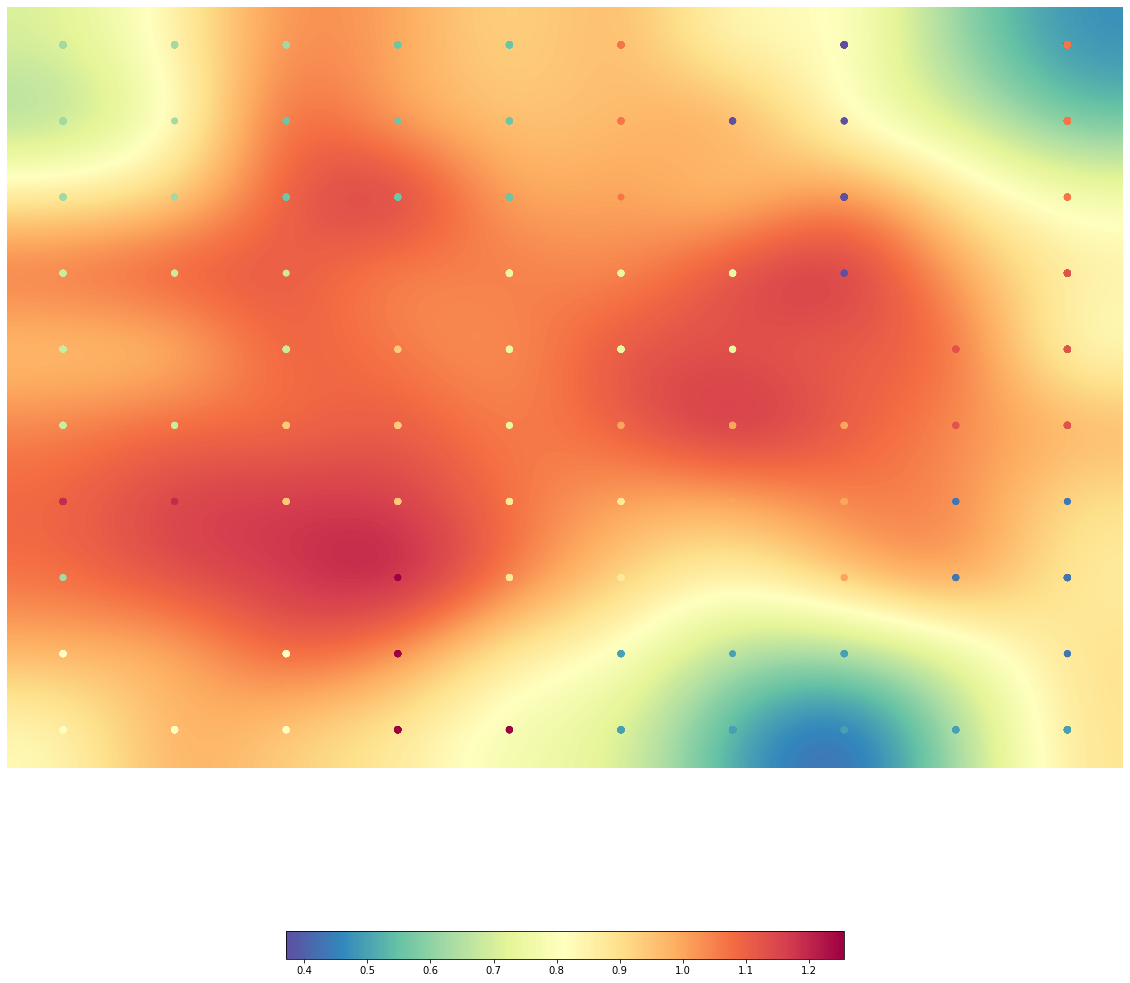

[[ 4  4  4  3  3 11  0  0 11 11]
 [ 4  4  3  3  3 11  0  0 11 11]
 [ 4  4  3  3  3 11  0  0  0 11]
 [ 5  5  5  3  6  6  6  0 12 12]
 [ 5  5  5  9  6  6  6 10 12 12]
 [ 5  5  9  9  6 10 10 10 12 12]
 [13 13  9  9  8  8 10 10  1  1]
 [ 4 13 14 14  8  8  8 10  1  1]
 [ 7  7  7 14 14  2  2  2  2  1]
 [ 7  7  7 14 14  2  2  2  2  2]]
Clusters sorted by increasing number of neurons
Cluster index
Number of neurons
[[13  1  8  9  7 12 14  6 10  0]
 [ 3  5  5  5  6  6  6  7  7  8]]


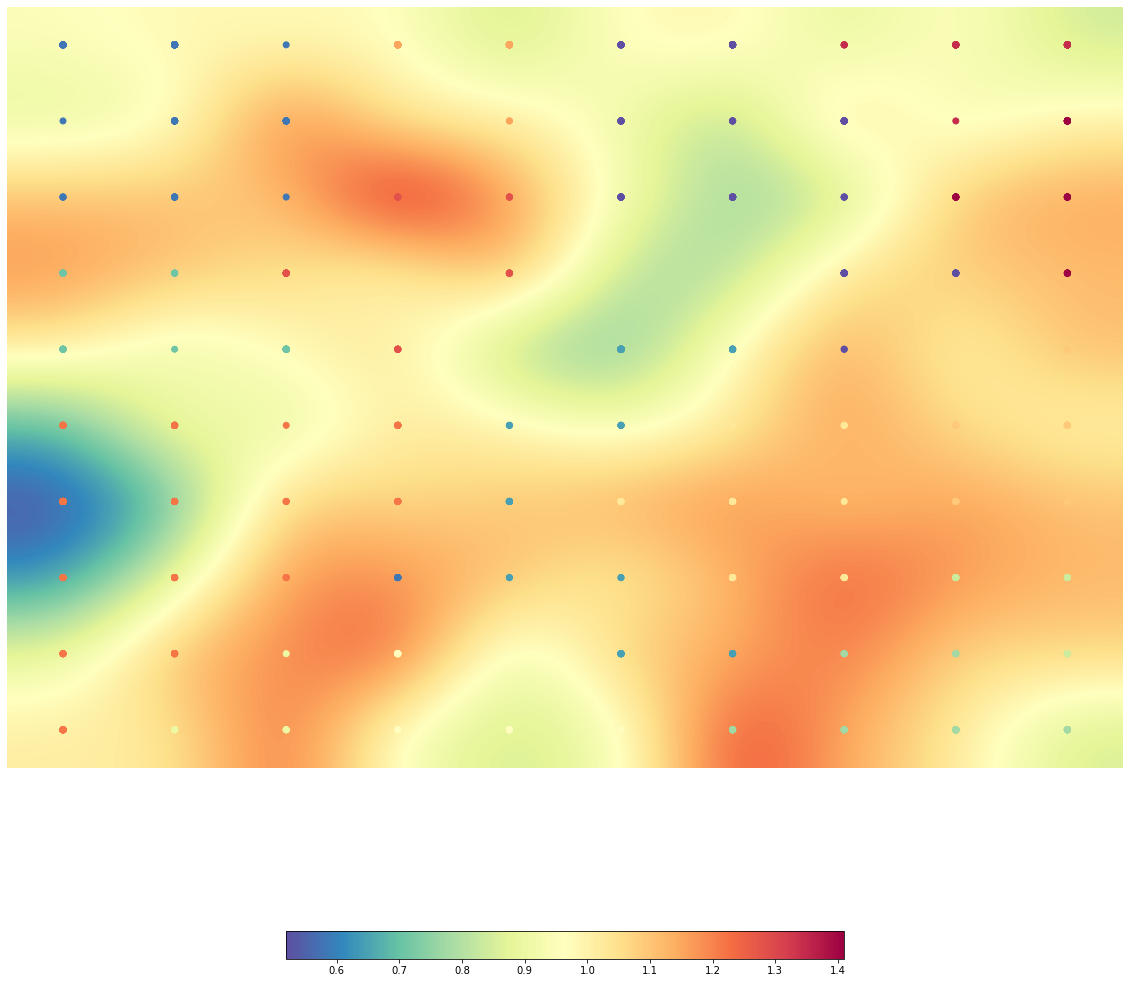

[[ 1  1  1 10 10  0  0 13 13 13]
 [ 1  1  1 10 10  0  0  0 13 14]
 [ 1  1  1 12 12  0  0  0 14 14]
 [ 3  3 12 12 12  2  0  0  0 14]
 [ 3  3  3 12  2  2  2  0  0  9]
 [11 11 11 11  2  2  8  8  9  9]
 [11 11 11 11  2  8  8  8  9  9]
 [11 11 11  1  2  2  8  8  5  5]
 [11 11  6  7  7  2  2  4  4  5]
 [11  6  6  7  7  7  4  4  4  4]]
Clusters sorted by increasing number of neurons
Cluster index
Number of neurons
[[ 5  6 10 13 14  3  7  9  4 12]
 [ 3  3  4  4  4  5  5  5  6  6]]


In [ ]:
som_list = ['som_10_1000_pl_rec.pkl',
           'som_10_1000_tor_rec.pkl',
           'som_10_1000_pl_rec_true.pkl']

for i in [0,2]:
    som = joblib.load(som_list[i])
    som_algorithm(som,15)

Παρατηρούμε πως όταν `compactsupport = 'False'` εμφανίζονται πιο έντονα οι περιοχές ορίων, ενώ για `compactsupport = 'True'`, εμφανίζονται περισσότερο οι περιοχές χαμηλής απόστασης.

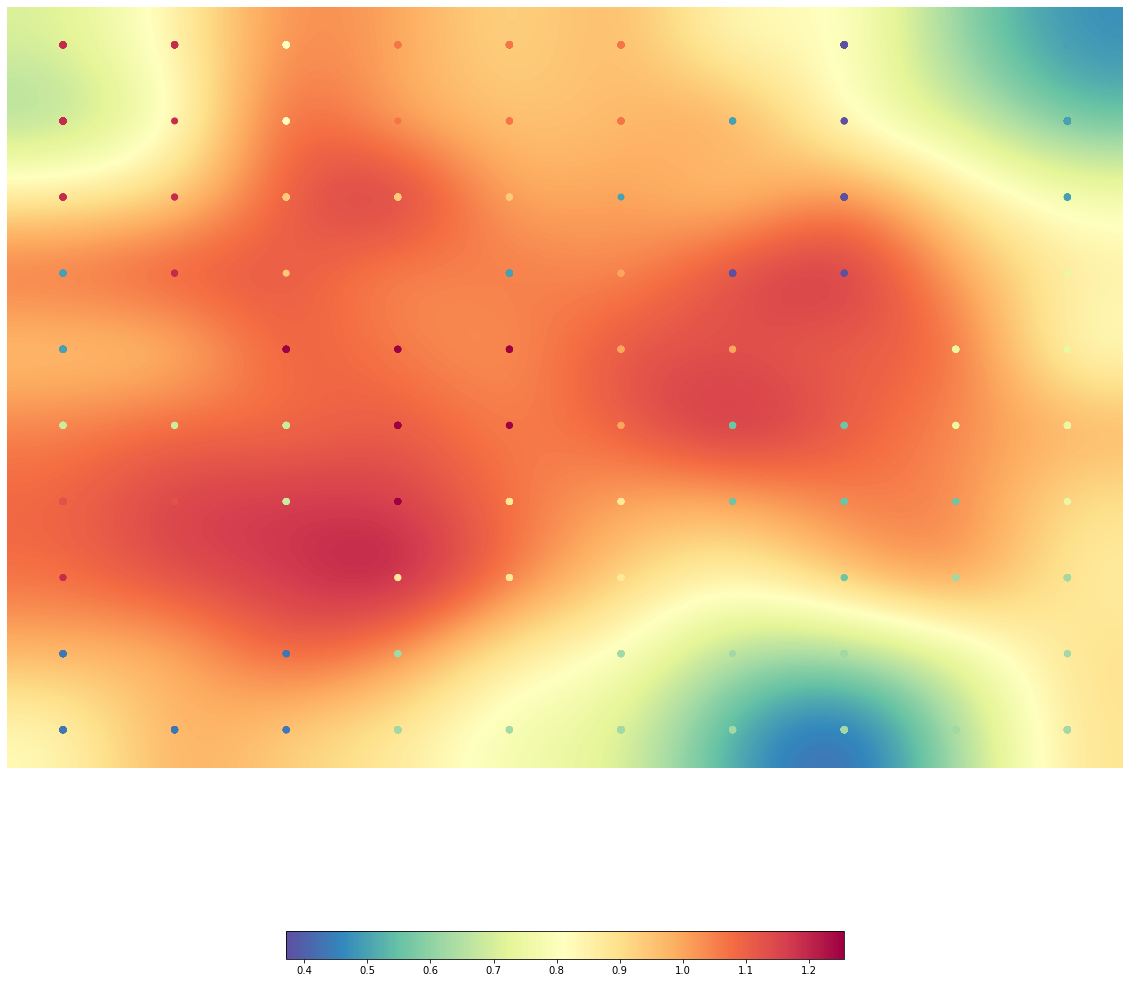

[[13 13  7 11 11 11  0  0  2  2]
 [13 13  7 11 11 11  2  0  2  2]
 [13 13  9  9  9  2  0  0  2  2]
 [ 2 13  9  9  2 10  0  0  6  6]
 [ 2  5 14 14 14 10 10  3  6  6]
 [ 5  5  5 14 14 10  3  3  6  6]
 [12 12  5 14  8  8  3  3  3  6]
 [13 12  4  8  8  8  8  3  4  4]
 [ 1  1  1  4  4  4  4  4  4  4]
 [ 1  1  1  4  4  4  4  4  4  4]]
Clusters sorted by increasing number of neurons
Cluster index
Number of neurons
[[ 7 12 10  5  9  1  8 11 14  0]
 [ 2  3  4  5  5  6  6  6  6  7]]


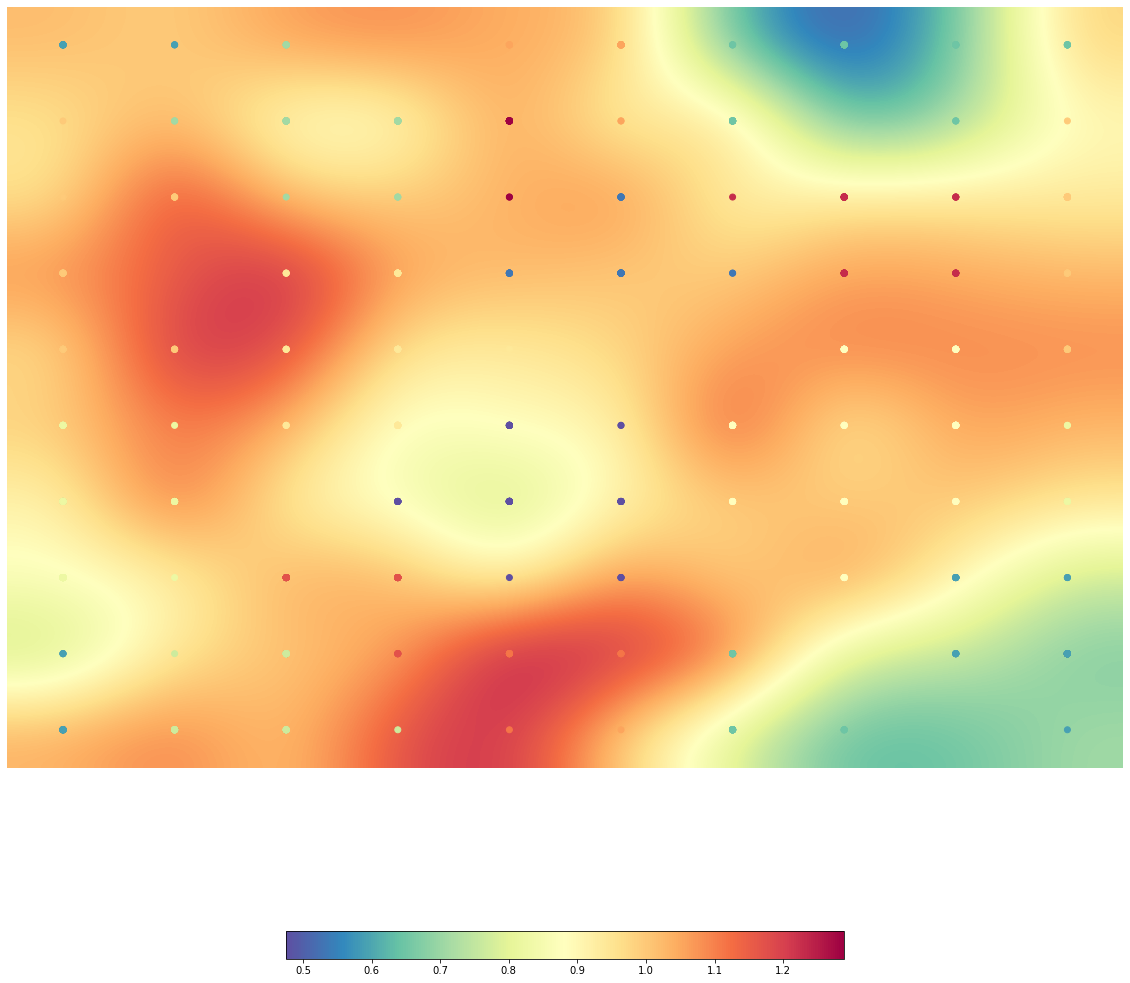

[[ 2  2  4  4 10 10  3  3  3  3]
 [ 9  4  4  4 14 10  3  3  3  9]
 [ 9  9  4  4 14  1 13 13 13  9]
 [ 9  9  8  8  1  1  1 13 13  9]
 [ 9  9  8  8  8  1  7  7  7  9]
 [ 6  6  8  8  0  0  7  7  7  6]
 [ 6  6 12  0  0  0  7  7  7  6]
 [ 6  6 12 12  0  0  3  7  2  2]
 [ 2  5  5 12 11 11  3  3  2  2]
 [ 2  5  5  5 11 10  3  3  3  2]]
Clusters sorted by increasing number of neurons
Cluster index
Number of neurons
[[14 11 10 12  1  5 13  0  4  8]
 [ 2  3  4  4  5  5  5  7  7  7]]


In [ ]:
for i in [0,1]:
    som = joblib.load(som_list[i])
    som_algorithm(som,15)

Παρομοίως, για `maptype = 'planar'` έχουμε αρκετά έντονες τις περιοχές ορίων, ενώ για `maptype = 'toroid'` εμφανίζονται και περιοχές χαμηλής απόστασης.

Τελικά, αποφασίσαμε να χρησιμοποιήσουμε τις αρχικές παραμέτρους για την εκπαίδευση όλων των SOM που θα μελετήσουμε στη συνέχεια, δηλαδή `maptype = 'planar'`, `gridtype = 'rectangular'` και `compactsupport = 'False'`.



Στο σημείο αυτό, θα κατασκευάσουμε χάρτες SOM διαφορετικών διαστάσεων για final sets που περιέχουν 2000 ταινίες και θα σχολιάσουμε τα χαρακτηριστικά τους.

Ξεκινάμε από έναν μικρό χάρτη με grid 10 X 10 και 10 clusters στον K_means

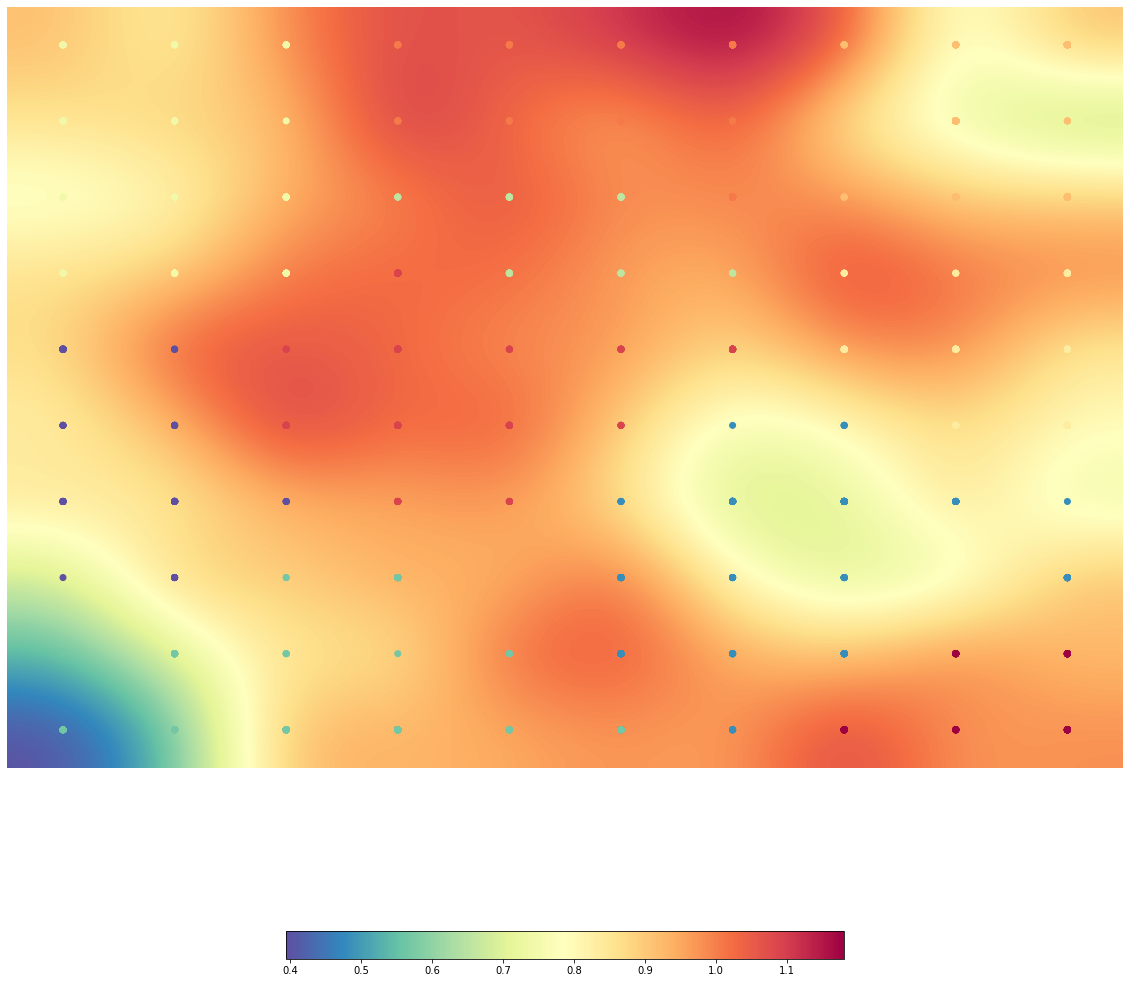

[[4 4 4 7 7 7 7 6 6 6]
 [4 4 4 7 7 7 7 6 6 6]
 [4 4 4 3 3 3 7 6 6 6]
 [4 4 4 8 3 3 3 5 5 5]
 [0 0 8 8 8 8 8 5 5 5]
 [0 0 8 8 8 8 1 1 5 5]
 [0 0 0 8 8 1 1 1 1 1]
 [0 0 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 9 9]
 [2 2 2 2 2 2 1 9 9 9]]
Clusters sorted by increasing number of neurons
Cluster index
Number of neurons
[[ 9  3  5  0  6  7  4  8  2  1]
 [ 5  6  8  9  9  9 12 12 14 16]]


In [ ]:
som = joblib.load('som_10.pkl')
som_algorithm(som,10)

Παρατηρούμε πως ήδη διακρίνονται οπτικά στο χάρτη τα πρώτα clusters, τα οποία βρίσκονται είτε σε περιοχές μικρής απόστασης (μπλε - πράσινα - κίτρινα) σημεία που περικλείονται από κόκκινα όρια, είτε στα κόκκινα όρια. Επίσης με τη βοήθεια του παρακάτω πίνακα που απεικονίζει τον αριθμό των ταινιών στο κάθε cluster παρατηρούμε πως τα μεγάλα σε μέγεθος grids είναι αυτά που έχουν και πολλές ταινίες στο χώρο εισόδου.

In [ ]:
total_cluster_comp(10)

Cluster ID  ...                                   Top 3 Categories
0           0  ...  [("Comedy", 65), ("Short Film", 59), ("Black-a...
1           1  ...  [("Black-and-white", 56), ("Adventure", 14), (...
2           2  ...  [("Black-and-white", 82), ("Silent film", 81),...
3           3  ...     [("Comedy", 35), ("Indie", 34), ("Drama", 32)]
4           4  ...  [("Comedy", 247), ("Parody", 34), ("World cine...
5           5  ...  [("Drama", 44), ("Thriller", 39), ("Mystery", ...
6           6  ...  [("Drama", 73), ("Thriller", 62), ("Comedy", 16)]
7           7  ...  [("Comedy", 84), ("Drama", 78), ("Comedy-drama...
8           8  ...  [("Comedy", 87), ("Black-and-white", 55), ("In...
9           9  ...  [("Black-and-white", 25), ("Comedy", 21), ("Ro...

[10 rows x 4 columns]

Για τις ίδιες διαστάσεις χάρτη θα αυξήσουμε τώρα τον αριθμό των clusters του K-Means σε 15.

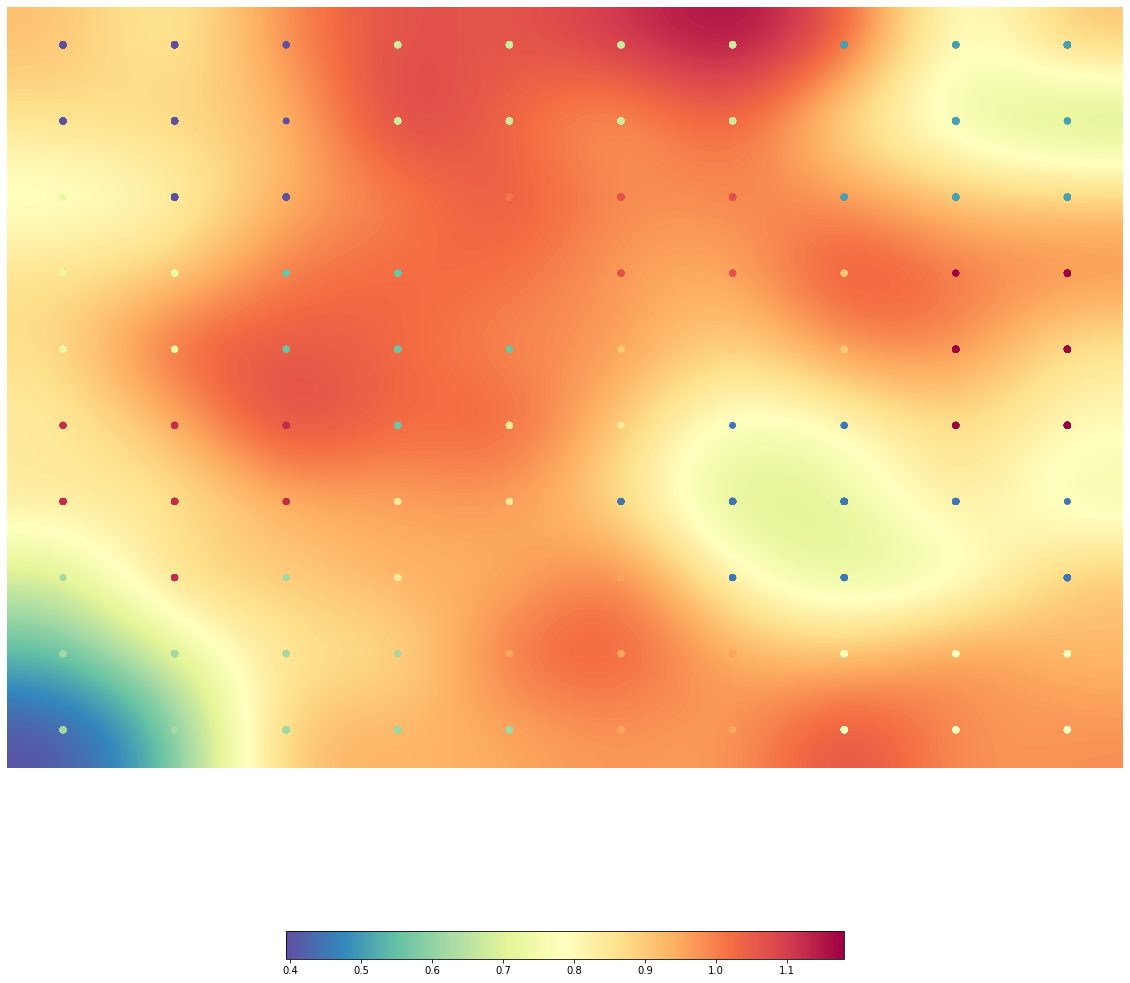

[[ 0  0  0  5  5  5  5  2  2  2]
 [ 0  0  0  5  5  5  5  2  2  2]
 [ 6  0  0 11 11 12 12  2  2  2]
 [ 6  6  3  3 11 12 12  9 14 14]
 [ 6  6  3  3  3  9  9  9 14 14]
 [13 13 13  3  8  8  1  1 14 14]
 [13 13 13  8  8  1  1  1  1  1]
 [ 4 13  4  8  8 10  1  1  1  1]
 [ 4  4  4  4 10 10 10  7  7  7]
 [ 4  4  4  4  4 10 10  7  7  7]]
Clusters sorted by increasing number of neurons
Cluster index
Number of neurons
[[11  9 12  6  3  7  8 10 14 13  0  5  2  1  4]
 [ 3  4  4  5  6  6  6  6  6  7  8  8  9 11 11]]


In [ ]:
som_algorithm(som,15)

Παρατηρούμε πως εσωτερικά των σημείων χαμηλής απόστασης τα clusters διατηρήθηκαν ίδια, ενώ στα σύνορα (περιοχές δηλαδή με μεγάλη απόσταση) ο αλγόριθμος ξεκίνησε να δημιουργεί νέες κατηγορίες. Αυτό είναι ένα σημάδι πως μπορούμε να αναζητήσουμε περισσότερες αρκετά διακριτές κατηγορίες με αύξηση των διαστάσεων του χάρτη.

In [ ]:
total_cluster_comp(15)

Cluster ID  ...                                   Top 3 Categories
0            0  ...  [("Comedy", 198), ("World cinema", 22), ("Blac...
1            1  ...  [("Black-and-white", 45), ("Thriller", 12), ("...
2            2  ...  [("Drama", 73), ("Thriller", 62), ("Comedy", 16)]
3            3  ...    [("Comedy", 32), ("Indie", 28), ("Parody", 12)]
4            4  ...  [("Black-and-white", 50), ("Short Film", 47), ...
5            5  ...  [("Comedy", 77), ("Drama", 71), ("Comedy-drama...
6            6  ...  [("Comedy", 53), ("Parody", 38), ("Slapstick",...
7            7  ...  [("Black-and-white", 28), ("Comedy", 21), ("Ro...
8            8  ...  [("Black-and-white", 50), ("Comedy", 50), ("Mu...
9            9  ...  [("Drama", 13), ("Comedy", 12), ("Black-and-wh...
10          10  ...  [("Black-and-white", 42), ("Silent film", 42),...
11          11  ...  [("Comedy", 14), ("Indie", 14), ("Black comedy...
12          12  ...     [("Comedy", 28), ("Drama", 28), ("Indie", 27)]
13          13  ...  [("Comedy", 54), ("Short Film", 54), ("Black-a...
14          14  ...  [("Drama", 41), ("Thriller", 37), ("Mystery", ...

[15 rows x 4 columns]

Από την ανάλυση του πίνακα με τα χαρακτηριστικά του περιεχομένου του κάθε cluster παρατηρούμε πως τα cluster που δημιουργούνται έχουν ξεκάθαρο περιεχόμενο και κατηγορίες που προηγουμένων αποτελούσαν μία κοινή πλέον σπάνε στις υποκατηγορίες τους. Παράδειγμα το cluster = 10 με κύριες κατηγορίες τις `Black and White` και `Silent Film` το οποίο πλέον έχει 42 ταινίες ενώ στην προηγούμενη εκτέλεση του k-means το αντίστοιχο με cluster_id = 2 είχε 90.

Παρατηρούμε όμως πως ο χάρτης είναι μικρός σε διαστάσεις για να αποτυπώσει με επιτυχία τα δεδομένα, οπότε θα δοκιμάσουμε μεγαλύτερους.

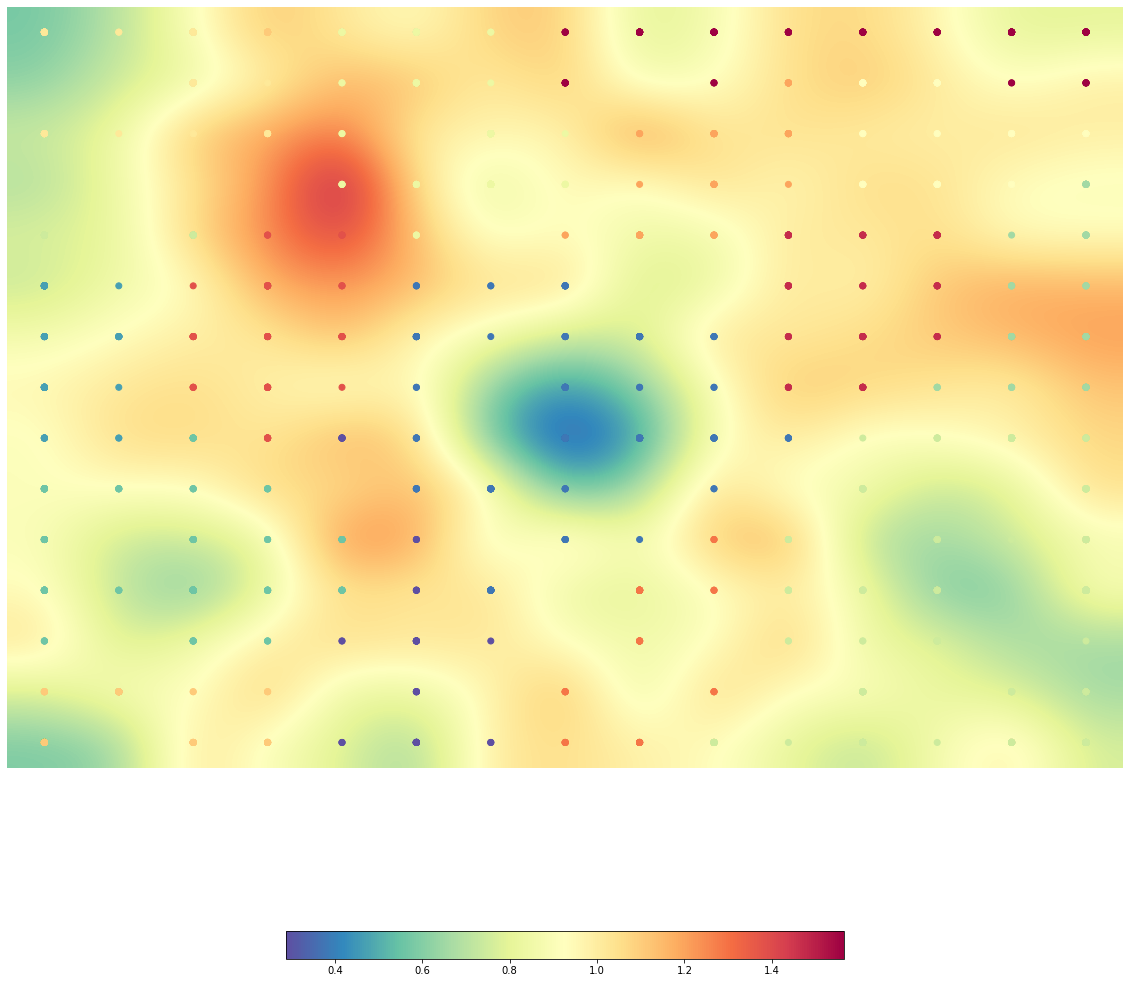

[[ 8  8  8  9  6  6  6 14 14 14 14 14 14 14 14]
 [ 8  8  8  8  6  6  6 14 14 14 10  7  7 14 14]
 [ 8  8  8  8  6  6  6  6 10 10 10  7  7  7  7]
 [ 5  5  8  1  6  6  6  6 10 10 10  7  7  7  4]
 [ 5  5  5 12 12  6  6 10 10 10 13 13 13  4  4]
 [ 2  2 12 12 12  1  1  1  1  1 13 13 13  4  4]
 [ 2  2 12 12 12  1  1  1  1  1 13 13 13  4  4]
 [ 2  2 12 12 12  1  1  1  1  1 13 13  4  4  4]
 [ 2  2  3 12  0  1  1  1  1  1  1  5  5  5  5]
 [ 3  3  3  3  3  1  1  1  1  1  5  5  5  5  5]
 [ 3  3  3  3  3  0  1  1  1 11  5  5  5  5  5]
 [ 3  3  3  3  3  0  1  1 11 11  5  5  5  5  5]
 [ 3  3  3  3  0  0  0 11 11 11  5  5  5  5  5]
 [ 9  9  9  9  0  0  0 11 11 11  5  5  5  5  5]
 [ 9  9  9  9  0  0  0 11 11  5  5  5  5  5  5]]
Clusters sorted by increasing number of neurons
Cluster index
Number of neurons
[[ 2  7  9  4 10 11 13  0  8 12 14  6  3  1  5]
 [ 8  9  9 10 10 11 11 12 12 12 13 16 20 32 40]]


In [ ]:
som = joblib.load('som15.pkl')
som_algorithm(som,15)

Ο 15 Χ 15 προσθέτει περισσότερες διακριτές περιοχές χαμηλής απόστασης ενώ μειώνει δραστικά τα όρια μεταξύ τους. Παρατηρούμε όμως πως τα 15 clusters τα οποία θέσαμε στον K-Means δεν είναι αρκετά, καθώς δε σέβονται τα όρια των περιοχών, οπότε θα επαναλάβουμε το clustering για k = 25 αυτή τη φορά.

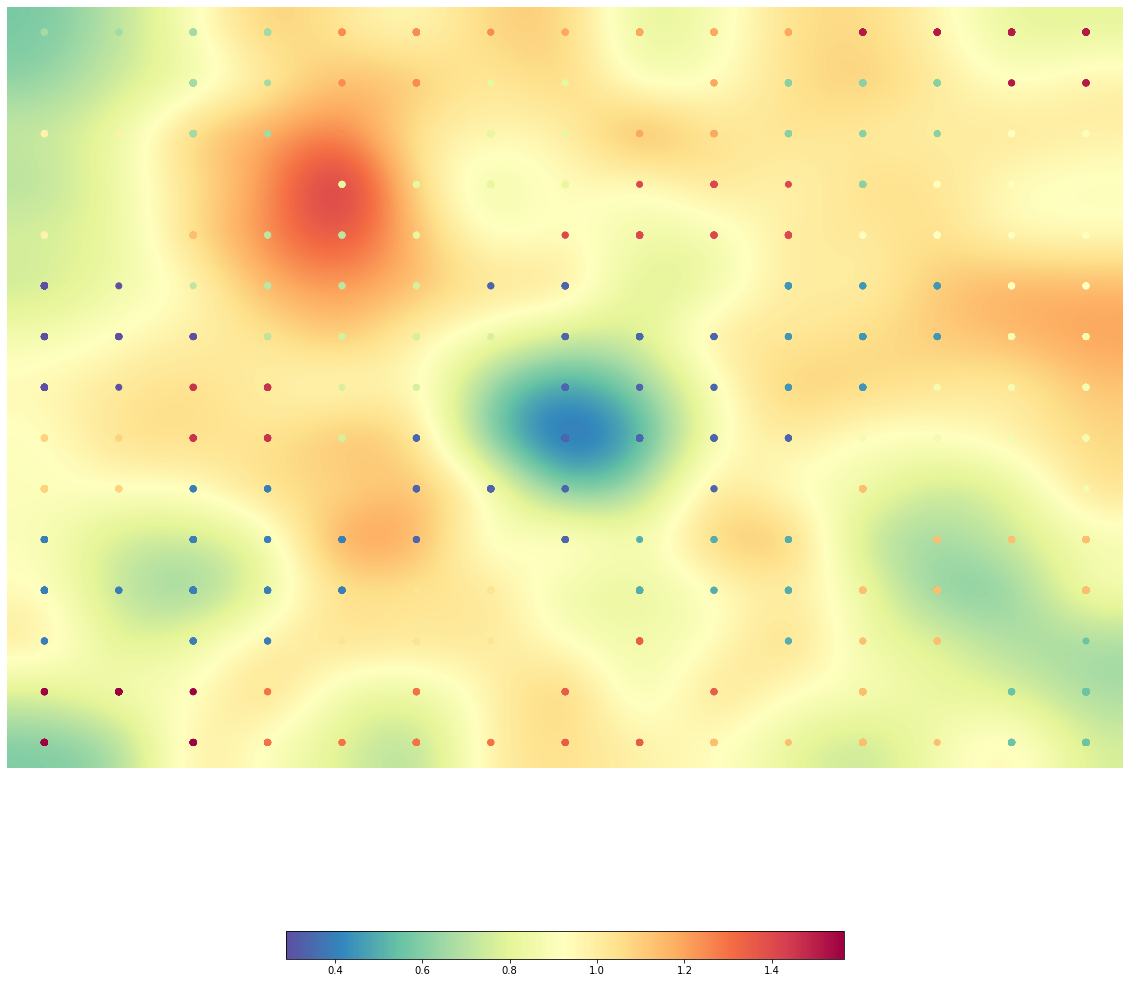

[[ 7  7  7  7 18 18 18 17 17 17 17 23 23 23 23]
 [13  7  7  7 18 18 10 10 17 17  6  6  6 23 23]
 [13 13  7  7 18 10 10 10 17 17  6  6  6 12 12]
 [13 13 13  1 10 10 10 10 21 21 21  6 12 12 12]
 [13 13 16  8  8 10 10 21 21 21 21 12 12 12 12]
 [ 0  0  8  8  8  9  1  1  1  1  3  3  3 12 12]
 [ 0  0  0  8  9  9  9  1  1  1  3  3  3 11 11]
 [ 0  0 22 22  9  9  1  1  1  1  3  3 11 11 11]
 [15 15 22 22  9  1  1  1  1  1  1 11 11 11 11]
 [15 15  2  2  2  1  1  1  1  1 16 16 16 11 11]
 [ 2  2  2  2  2  1  1  1  4  4  4 16 16 16 16]
 [ 2  2  2  2  2 14 14  1  4  4  4 16 16 16 16]
 [ 2  2  2  2 14 14 14 20 20 20  4 16 16 16  5]
 [24 24 24 19 19 19 19 20 20 20 16 16 16  5  5]
 [24 24 24 19 19 19 19 20 20 16 16 16 16  5  5]]
Clusters sorted by increasing number of neurons
Cluster index
Number of neurons
[[22 15  5 14 24 18 23  8 21  0  6  4  9 13 17  3 19 20  7 10 11 12  2 16
   1]
 [ 4  4  5  5  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9 11 11 11 17 22
  27]]


In [ ]:
som_algorithm(som,25)

Παρατηρούμε πως η αύξηση του K-Means περιορίζει τα clusters εντός των περιοχών του χάρτη, χωρίς ακόμα όμως να σέβονται απόλυτα την τοπολογία. Παρατηρώντας και παρακάτω την ανάλυση των χαρακτηριστικών των clusters βλέπουμε πως υπάρχουν clusters χωρίς τόσο σαφές περιεχόμενο, όπως το cluster = 2 και το cluster = 19.

In [ ]:
total_cluster_comp(25)

Cluster ID  ...                                   Top 3 Categories
0            0  ...  [("Comedy", 57), ("Short Film", 57), ("Black-a...
1            1  ...  [("Black-and-white", 97), ("Comedy", 41), ("Ro...
2            2  ...  [("Short Film", 100), ("Silent film", 62), ("D...
3            3  ...  [("Mystery", 53), ("Thriller", 53), ("Horror",...
4            4  ...  [("Comedy", 60), ("Romance Film", 60), ("Roman...
5            5  ...  [("Comedy", 30), ("Drama", 30), ("Romantic com...
6            6  ...  [("Drama", 39), ("Thriller", 38), ("Crime Fict...
7            7  ...  [("Comedy", 194), ("World cinema", 24), ("Blac...
8            8  ...  [("Comedy", 29), ("Indie", 22), ("Black-and-wh...
9            9  ...  [("Black-and-white", 68), ("Comedy", 48), ("Si...
10          10  ...     [("Comedy", 61), ("Drama", 60), ("Indie", 33)]
11          11  ...  [("Thriller", 32), ("Psychological thriller", ...
12          12  ...  [("Thriller", 55), ("Crime Fiction", 46), ("My...
13          13  ...  [("Comedy", 68), ("Parody", 42), ("Slapstick",...
14          14  ...  [("Romantic comedy", 12), ("Silent film", 1), ...
15          15  ...  [("Short Film", 9), ("Indie", 4), ("Propaganda...
16          16  ...  [("Comedy", 119), ("Romance Film", 105), ("Rom...
17          17  ...  [("Drama", 63), ("Thriller", 63), ("Horror", 18)]
18          18  ...  [("Comedy", 78), ("Drama", 78), ("Comedy-drama...
19          19  ...  [("Musical", 18), ("War film", 18), ("Comedy-d...
20          20  ...  [("Comedy", 29), ("Musical", 23), ("Romance Fi...
21          21  ...  [("Drama", 41), ("Mystery", 41), ("Thriller", ...
22          22  ...  [("Black-and-white", 37), ("Indie", 37), ("Sil...
23          23  ...  [("Crime Fiction", 63), ("Drama", 63), ("Thril...
24          24  ...  [("Documentary", 42), ("Biography", 19), ("Cul...

[25 rows x 4 columns]

Ήδη από μικρούς χάρτες παρατηρούμε πως clusters που αναπαριστούν διαφορετικές κατηγορίες βρίσκονται αρκετά μακριά στο χάρτη. Συγκεκριμένα, το cluster = 0 και το cluster = 11 που αναπαριστούν κωμωδίες και θρίλερ βρίσκονται αντιδιαμετρικά στο χάρτη.

Όπως θα δούμε όμως αργότερα στην ανάλυσή μας κανένα είδος δεν είναι απόλυτα ασυσχέτιστο με τα υπόλοιπα με αποτέλεσμα να υπάρχουν παράδοξες γειτνιάσεις οι οποίες μπορούν να εξηγηθούν με λίγη παραπάνω μελέτη των χαρακτηριστικών.

Αυξάνουμε ακόμα περισσότερο τις διαστάσεις του χάρτη σε 20 Χ 20 με σκοπό να αυξήσουμε τη λεπτομέρεια της απεικόνισης.

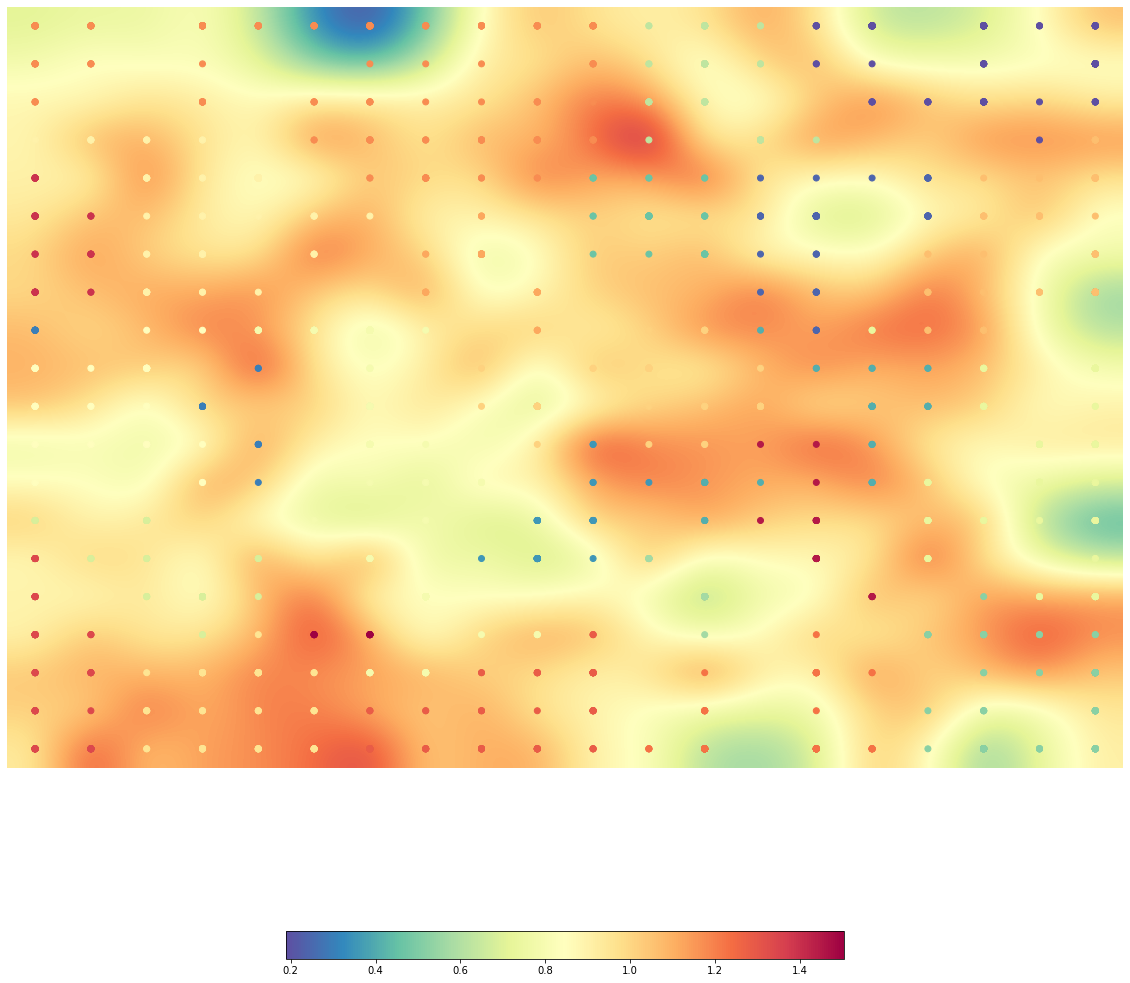

[[18 18 18 18 18 18 18 18 18 18 18  8  8  8  0  0  0  0  0  0]
 [18 18 18 18 18 18 18 18 18 18 18  8  8  8  0  0  0  0  0  0]
 [18 18 18 18 18 18 18 18 18 18 18  8  8  8  0  0  0  0  0  0]
 [13 13 13 13 13 18 18 18 18 18 18  8  8  8  8  0  0  0  0 16]
 [22 22 13 13 13 13 18 18 18 18  5  5  5  1  1  1  1 16 16 16]
 [22 22 13 13 13 13 13 17 17 17  5  5  5  1  1  1  1 16 16 16]
 [22 22 13 13 13 13 13 17 17 17  5  5  5  1  1  1 16 16 16 16]
 [22 22 13 13 13 11 11 17 17 17 17 15  5  1  1  1 16 16 16 16]
 [ 2 12 12 12 11 11 11 11 17 17 15 15 15  4  1 10 16 16 16 16]
 [12 12 12 12  2 11 11 11 15 15 15 15 15 15  4  4  4 10 10 10]
 [12 12 12  2  2 11 11 11 15 15 15 15 15 15  4  4  4 10 10 10]
 [12 12 12 12  2 11 11 11 11 15  3 15 15 23 23  4  4 10 10 10]
 [12 12 12 12  2 11 11 11 11  3  3  3  4  4 23  4 10 10 10 10]
 [ 9  9  9  9 11 11 11 11  3  3  3  3  4 23 23 23 10 10 10 10]
 [21  9  9  9  9 11 11 11  3  3  3  7  7 23 23 23 10 10 10 10]
 [21 21  9  9  9 24 11 11 11  3  3  7  7  7 23 23 10  6

In [ ]:
som = joblib.load('som_20.pkl')
som_algorithm(som,25)

Παρατηρούμε πως στο χάρτη 20 Χ 20 ξεκινάνε να εμφανίζονται ξανά έντονες περιοχές ορίων και αυξάνεται πάλι ο αριθμός των περιοχών χαμηλής απόστασης στο χάρτη οι οποίες περικλείονται από όρια (κόκκινες περιοχές). Ακόμα και με K-Means με 25 clusters παρατηρούμε πως οπτικά τα clusters δε σέβονται απόλυτα τα όρια αυτών των περιοχών.

In [ ]:
total_cluster_comp(25)

Cluster ID  ...                                   Top 3 Categories
0            0  ...  [("Thriller", 172), ("Action", 169), ("Action/...
1            1  ...  [("Thriller", 72), ("Crime Fiction", 40), ("Cr...
2            2  ...  [("Silent film", 56), ("Drama", 11), ("Indie",...
3            3  ...  [("Comedy", 90), ("Romance Film", 90), ("Roman...
4            4  ...  [("Comedy", 57), ("Family Film", 47), ("Drama"...
5            5  ...  [("Thriller", 59), ("Mystery", 58), ("Crime Th...
6            6  ...  [("Drama", 70), ("Period piece", 45), ("Biogra...
7            7  ...  [("Romance Film", 33), ("Comedy", 32), ("Drama...
8            8  ...  [("Crime Fiction", 100), ("Thriller", 99), ("D...
9            9  ...  [("Documentary", 28), ("Chinese Movies", 22), ...
10          10  ...  [("Family Film", 137), ("Adventure", 72), ("Dr...
11          11  ...  [("Romance Film", 70), ("Musical", 57), ("Blac...
12          12  ...  [("Short Film", 115), ("Indie", 25), ("Silent ...
13          13  ...  [("Comedy", 143), ("Black-and-white", 75), ("I...
14          14  ...  [("World cinema", 37), ("Horror", 27), ("Crime...
15          15  ...  [("Comedy", 74), ("Romance Film", 63), ("Roman...
16          16  ...  [("Thriller", 92), ("Action", 50), ("Adventure...
17          17  ...  [("Black-and-white", 48), ("Thriller", 25), ("...
18          18  ...  [("Comedy", 359), ("Drama", 239), ("Thriller",...
19          19  ...  [("Drama", 96), ("Romance Film", 96), ("Indie"...
20          20  ...  [("Comedy film", 84), ("Romance Film", 35), ("...
21          21  ...  [("Documentary", 88), ("Japanese Movies", 54),...
22          22  ...  [("Comedy", 65), ("Short Film", 59), ("Black-a...
23          23  ...  [("Comedy", 47), ("Drama", 45), ("Romance Film...
24          24  ...  [("Bollywood", 9), ("Comedy film", 4), ("Music...

[25 rows x 4 columns]

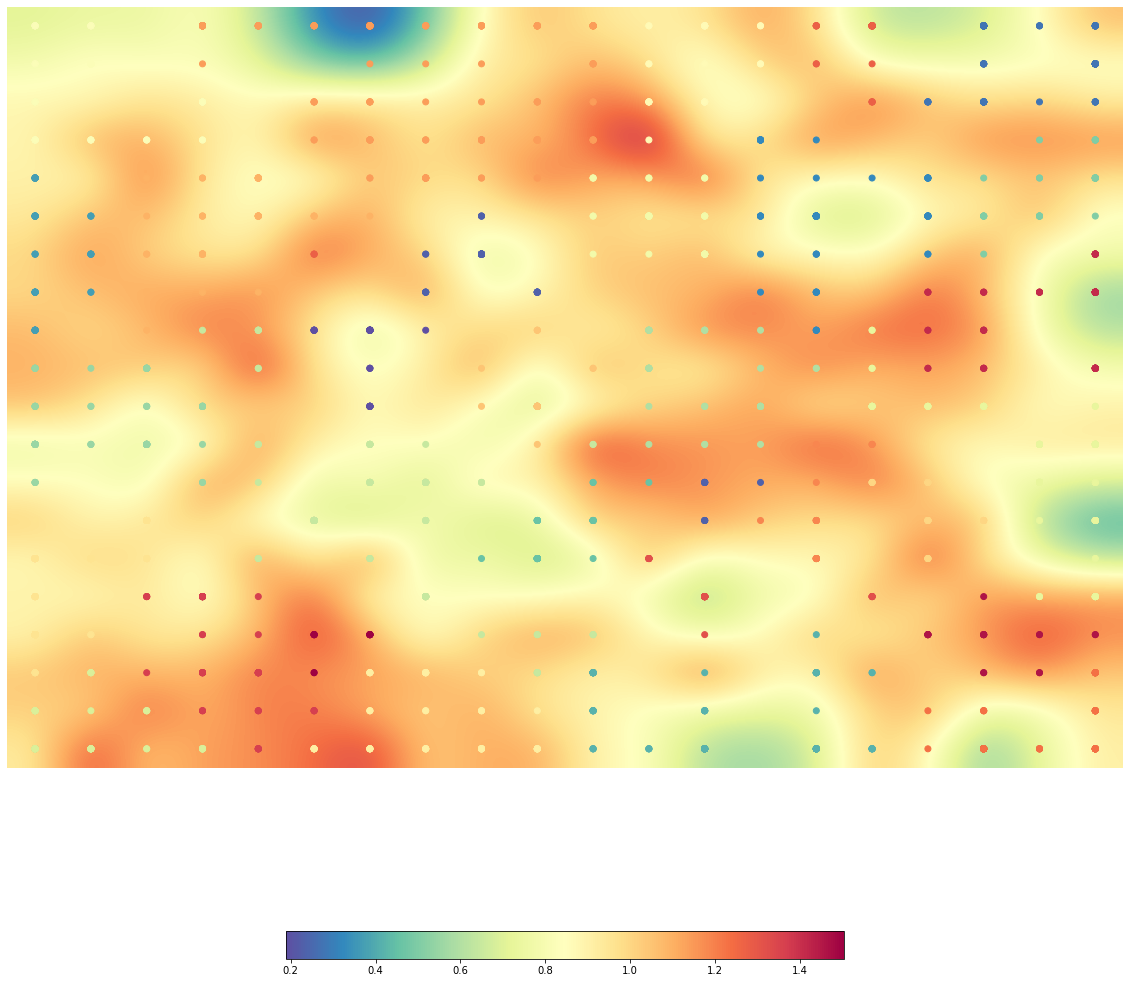

[[14 14 14 21 21 21 21 21 21 21 21 15 15 15 24 24 24  2  2  2]
 [14 14 14 21 21 21 21 21 21 21 21 15 15 15 24 24  2  2  2  2]
 [14 14 14 14 21 21 21 21 21 21 21 15 15 15 24 24  2  2  2  2]
 [14 14 14 14 20 21 21 21 21 21 21 15 15  3  3 24 24  2  7  7]
 [ 4  4 20 20 20 20 21 21 21 21 13 13 13  3  3  3  3  7  7  7]
 [ 4  4 20 20 20 20 20 21  1 21 13 13 13  3  3  3  3  7  7  7]
 [ 4  4 20 20 20 24 24  1  1  1 13 13 13  3  3  3  3  7  7 27]
 [ 4  4 20 20 20  0  0  1  1  1  1 13 13  3  3  3 27 27 27 27]
 [ 4  4 20 10 10  0  0  0 19 19 19  9  9  9  3 12 27 27 27 27]
 [ 8  8  8  8 10  0  0  0 19 19 19  9  9  9  9 12 27 27 27 27]
 [ 8  8  8  8  8  0  0  0 19 19 19  9  9  9  9 12 12 12 12 12]
 [ 8  8  8  8 10 10 10 10 10 19 10  9  9  9 22 22 12 12 12 12]
 [ 8  8  8  8 10 10 10 10 10  6  6  6  1  1 22 18 18 18 12 12]
 [17 17 17 17 10 10 10 10  6  6  6  6  1 22 22 18 18 18 12 12]
 [17 17 17 26 10 10 10 10  6  6  6 25 25 22 22 22 18 18 12 12]
 [17 17 26 26 26 29 10 10 10  6  6 25 25 25 22 25 12 28

In [ ]:
som_algorithm(som,30)

Παρατηρούμε πως το πρόβλημα που υπάρχει με τα όρια δε λύνεται ακόμα και μετά την αύξηση του αριθμού των clusters του K-Means, αντιθέτως ξεκινά πλέον να παρτηρείται η διάσπαση των περιοχών χαμηλής απόστασης σε επιμέρους clusters, χωρίς λομως να υπάρχει κάποιο διακριτό όριο μεταξύ τους. 

In [ ]:
total_cluster_comp(30)

Cluster ID  ...                                   Top 3 Categories
0            0  ...  [("Black-and-white", 29), ("Silent film", 22),...
1            1  ...  [("Black-and-white", 45), ("Drama", 35), ("Com...
2            2  ...  [("Action/Adventure", 107), ("Action", 104), (...
3            3  ...  [("Thriller", 118), ("Crime Fiction", 48), ("C...
4            4  ...  [("Comedy", 65), ("Short Film", 61), ("Black-a...
5            5  ...  [("Romance Film", 103), ("Drama", 100), ("Indi...
6            6  ...  [("Comedy", 51), ("Romance Film", 51), ("Roman...
7            7  ...  [("Action", 50), ("Thriller", 50), ("Drama", 18)]
8            8  ...  [("Short Film", 107), ("Silent film", 20), ("D...
9            9  ...  [("Comedy", 43), ("Romance Film", 32), ("Roman...
10          10  ...  [("Romance Film", 108), ("Romantic comedy", 76...
11          11  ...  [("Science Fiction", 47), ("World cinema", 36)...
12          12  ...  [("Family Film", 113), ("Drama", 53), ("Advent...
13          13  ...  [("Thriller", 67), ("Mystery", 66), ("Psycholo...
14          14  ...  [("Comedy", 254), ("Parody", 36), ("Black come...
15          15  ...  [("Drama", 93), ("Crime Fiction", 92), ("Thril...
16          16  ...  [("Comedy film", 88), ("Romance Film", 27), ("...
17          17  ...  [("Documentary", 116), ("Japanese Movies", 40)...
18          18  ...  [("Comedy", 29), ("Family Film", 27), ("Drama"...
19          19  ...  [("Comedy", 35), ("Romance Film", 35), ("Roman...
20          20  ...  [("Comedy", 97), ("Black-and-white", 77), ("In...
21          21  ...  [("Drama", 241), ("Comedy", 145), ("Thriller",...
22          22  ...  [("Comedy", 46), ("Drama", 40), ("Romance Film...
23          23  ...  [("Drama", 48), ("Period piece", 35), ("Biogra...
24          24  ...  [("Thriller", 64), ("Action", 61), ("Crime Fic...
25          25  ...  [("Romance Film", 34), ("Comedy", 33), ("Drama...
26          26  ...  [("Chinese Movies", 22), ("Adventure", 19), ("...
27          27  ...  [("Fantasy", 42), ("Family Film", 41), ("Adven...
28          28  ...  [("Drama", 22), ("Family Film", 13), ("Film ad...
29          29  ...  [("Comedy film", 12), ("Bollywood", 9), ("Crim...

[30 rows x 4 columns]

Θα αυξήσουμε ακόμα περισσότερο τις διαστάσεις του χάρτη σε 25 Χ 25.

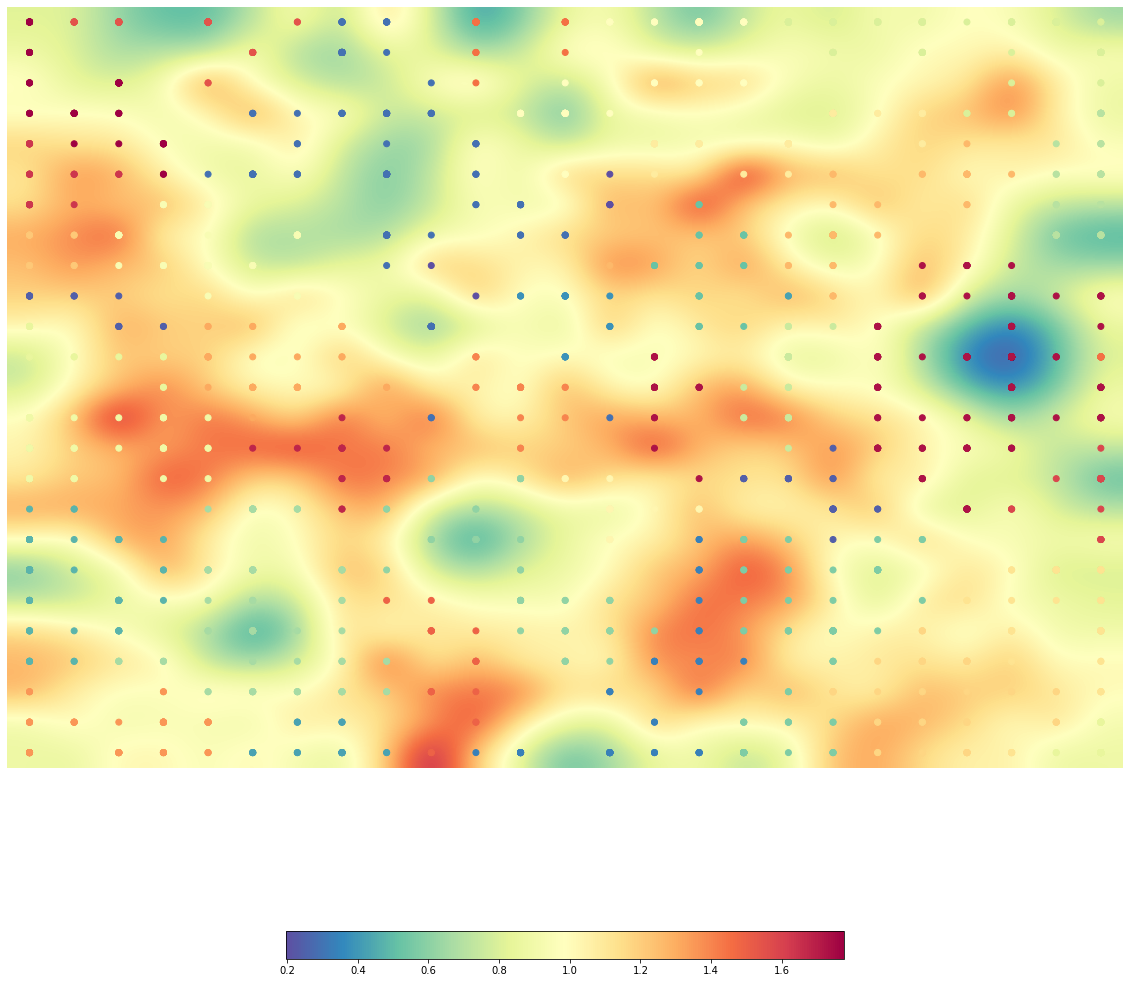

[[34 29 29 29 29 29 29  2  2 27 27 27 27 17 17 17 17 13 13 13 13 13 13 13
  13]
 [34 34 29 29 29 29  2  2  2 27 27 27 27 17 17 17 17 13 13 13 13 13 13 13
  13]
 [34 34 34 34 29 29  2  2  2  2 27 17 17 17 17 17 17 19 19 19 13 13 13 13
  13]
 [34 34 34 34  2  2  2  2  2  2  2 17 17 17 19 19 19 19 19 19 19 13 13 11
  11]
 [31 34 34 34  2  2  2  2  2  2  2  2 17 17 19 19 19 19 19 19 19 23 11 11
  11]
 [31 31 31 34  2  2  2  2  2  2  2  2 17  0 19 19 19 19 23 23 23 23 23 11
  11]
 [31 31 16 16 16  2 16  2  2  2  2  2  2  0  0  7  7 23 23 23 23 23 11 11
  11]
 [22 22 16 16 16 16 16  2  2  2  2  2  2  2  7  7  7 23 23 23 33 33 11 11
  11]
 [22 22 16 16 16 16 16  2  2  0  0  2  4 23  7  7  7 23 23 23 33 33 33 11
  11]
 [ 1  1  1 16 16 16 16 24  2  2  0  4  4  4  7  7  7  5 23 33 33 33 33 33
  33]
 [14 14  1  1 24 24 24 24  2  2  2  4  4  4  7  7  7 12 12 33 33 33 33 33
  33]
 [14 14 14 14 24 24 24 24  2  2 26 26  4  4 33 33 12 12 12 33 33 33 33 33
  27]
 [14 14 14 14 24 24 24 24 24  2 26 26 26

In [ ]:
som = joblib.load('som25.pkl')
som_algorithm(som,35)

Ο χάρτης 25 Χ 25 αποτελεί την καλύτερη λύση μέχρι στιγμής αφού όπως φαίνεται δημιουργεί εξίσου αρκετές περιοχές χαμηλής απόστασης και έντονα όρια, πράγματα που έλειπαν από τις προηγούμνες απόπειρές μας μέχρι στιγμής. 

Η επιλογή n_clusters = 35 για τον K-Means φαίνεται να ταιριάζει καλά στο συγκεκριμένο χάρτη, καθώς ο κάθε cluster φαίνεται να αντιστοιχεί σε μια διακριτή περιοχή, είτε αυτή είναι όριο, είτε περικλείεται από όρια. 

In [ ]:
total_cluster_comp(35)

Cluster ID  ...                                   Top 3 Categories
0            0  ...  [("Thriller", 7), ("Comedy", 6), ("Crime Thril...
1            1  ...  [("Drama", 26), ("Family Film", 26), ("Family ...
2            2  ...  [("Thriller", 166), ("Comedy", 154), ("Drama",...
3            3  ...  [("Drama", 142), ("World cinema", 139), ("Boll...
4            4  ...  [("Comedy", 28), ("Fantasy", 19), ("Romance Fi...
5            5  ...  [("Drama", 57), ("Romance Film", 57), ("Romant...
6            6  ...  [("Science Fiction", 112), ("Horror", 89), ("J...
7            7  ...  [("Thriller", 55), ("Family Film", 37), ("Come...
8            8  ...  [("Drama", 207), ("World cinema", 129), ("Peri...
9            9  ...  [("Romance Film", 171), ("Drama", 110), ("Come...
10          10  ...  [("Comedy film", 75), ("Drama", 56), ("Romanti...
11          11  ...  [("Action", 157), ("Drama", 75), ("War film", ...
12          12  ...  [("Family Film", 58), ("Children\s/Family", 46...
13          13  ...  [("Action/Adventure", 279), ("Action", 235), (...
14          14  ...  [("Drama", 357), ("Short Film", 93), ("Documen...
15          15  ...  [("Documentary", 114), ("War film", 21), ("Bio...
16          16  ...  [("Black-and-white", 92), ("Silent film", 89),...
17          17  ...  [("Thriller", 136), ("Crime Fiction", 126), ("...
18          18  ...  [("Drama", 45), ("Romance Film", 45), ("Comedy...
19          19  ...  [("Thriller", 96), ("Action", 61), ("Crime Fic...
20          20  ...  [("Drama", 151), ("Indie", 63), ("Comedy film"...
21          21  ...  [("Drama", 137), ("Black-and-white", 58), ("Wa...
22          22  ...  [("Black-and-white", 12), ("Short Film", 12), ...
23          23  ...  [("Action", 66), ("Adventure", 64), ("Fantasy"...
24          24  ...  [("Silent film", 52), ("Romantic comedy", 28),...
25          25  ...  [("Horror", 223), ("Slasher", 71), ("Thriller"...
26          26  ...  [("Romance Film", 97), ("Comedy", 95), ("Roman...
27          27  ...  [("Drama", 72), ("Thriller", 72), ("Crime Fict...
28          28  ...  [("Romance Film", 97), ("Drama", 96), ("Romant...
29          29  ...  [("Comedy", 129), ("Drama", 97), ("Comedy-dram...
30          30  ...  [("Drama", 89), ("Crime Fiction", 75), ("Short...
31          31  ...  [("Comedy", 56), ("Short Film", 52), ("Black-a...
32          32  ...  [("Musical", 50), ("Comedy", 44), ("Romance Fi...
33          33  ...  [("Animation", 246), ("Family Film", 170), ("S...
34          34  ...   [("Comedy", 253), ("Parody", 45), ("Indie", 29)]

[35 rows x 4 columns]

Τέλος θα κάνουμε μία τελευταία προσπάθεια να αυξήσουμε πάλι τις διαστάσεις του χάρτη με σκοπό να ελέγξουμε τα όρια λεπτομέρειας στα οποία μπορούμε να φτάσουμε.

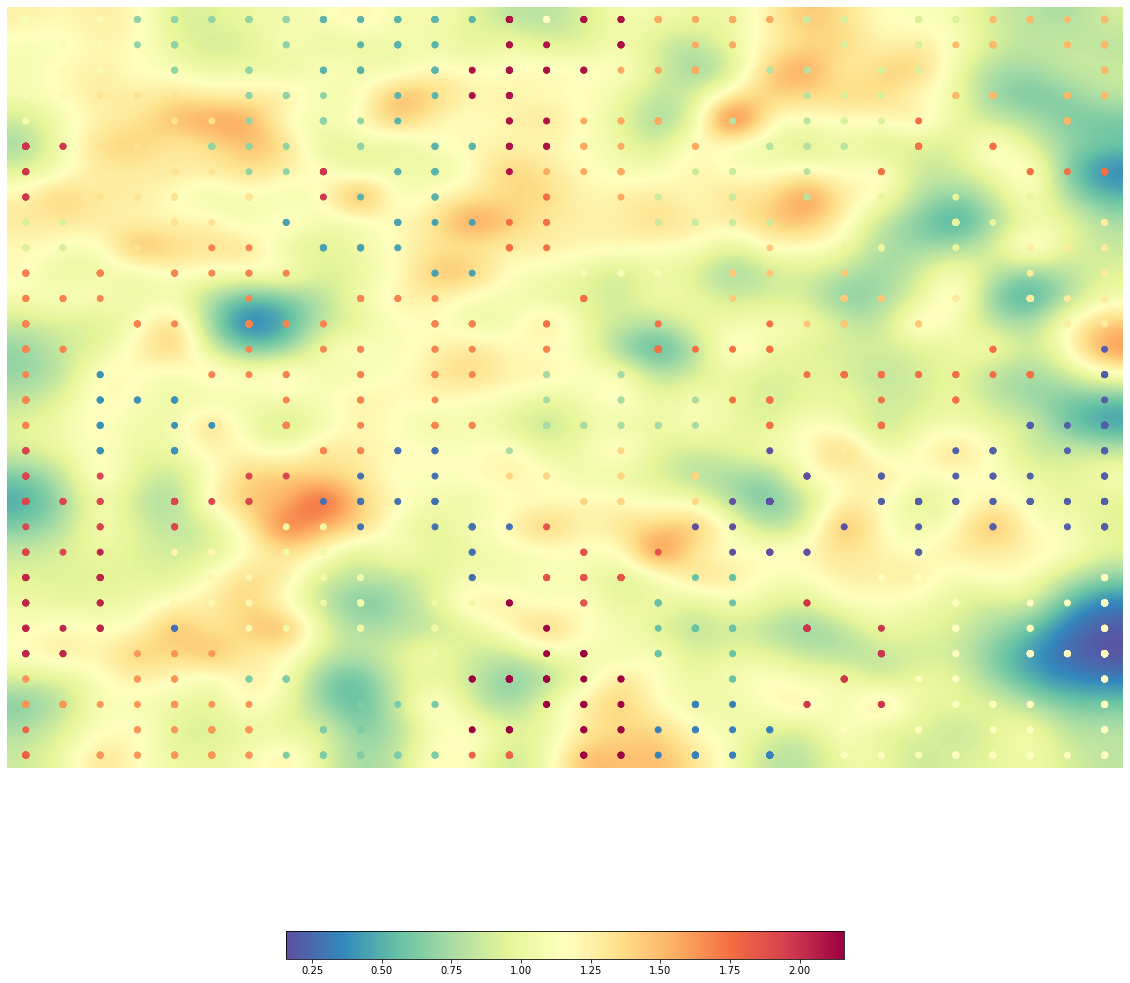

[[16 16 16  9  9  9  9  9  6  6  6  6  6 33 17 33 33 24 24 24 24 12 13 13
  13 13 23 23 23 23]
 [16 16 16  9  9  9  9  9  6  6  6  6 33 33 33 33 33 24 24 24 24 13 13 13
  13 23 23 23 23 23]
 [16 16 16 20  9  9  9  9  6  6  6  6 33 33 33 33 24 24 24 24 11 11 13 13
  13 23 23 23 23 23]
 [16 16 20 20 20  9  9  9  9  6  6  6 33 33 33 33 24 24 24 24 11 11 13 13
  13 23 23 23 23 23]
 [16 16 20 20 20 20  9  9  9  9  6  6 33 33 33 24 24 24 24 11 11 11 13 13
  27 23 23 23 23 23]
 [31 31 20 20 20  9  9  9  9  9  6  6  6 33 33 24 24 24 24 11 11 11 11 27
  27 27 27 27 23 27]
 [31 31 20 20 20 20  9  9 31  9  6  6  6 33 24 24 24 24 12 12 11 11 11 27
  27 14 27 27 27 27]
 [31 20 20 20 20 20 20 20 31  6  5  6  6 27 27 24 24 12 12 12 12 11 14 14
  14 14 14 14 27 27]
 [13 13 20 20 20 20 20  5  5  5  5  5  5 27 27 27 12 12 12 12 12 11 14 14
  14 14 14 14 19 19]
 [13 13 26 20 20 26 26  5  5  5  5  5  5 27 27 16 16 16 12 22 22 22 14 14
  14 14 14 19 19 19]
 [26 26 26 26 26 26 26 26  5  5  5  5  5  5 16 16 

In [ ]:
som = joblib.load('som_30.pkl')
som_algorithm(som,35)

Παρατηρούμε πως στον πίνακα 30 Χ 30 απεικονίζονται όπως είναι λογικό περισσότερες περιοχές χαμηλής απόστασης και επίσης η ένταση των ορίων έχει μειωθεί αρκετά, καθώς οι μεταβάσεις είναι πιο ομαλές. Επίσης ο αριθμός των clusters του Κ-Means είναι και πάλι μικρός συγκριτικά με την τοπολογία του χάρτη για αυτό αυξάνουμε σε n_clusters = 40 και επαναλαμβάνουμε.

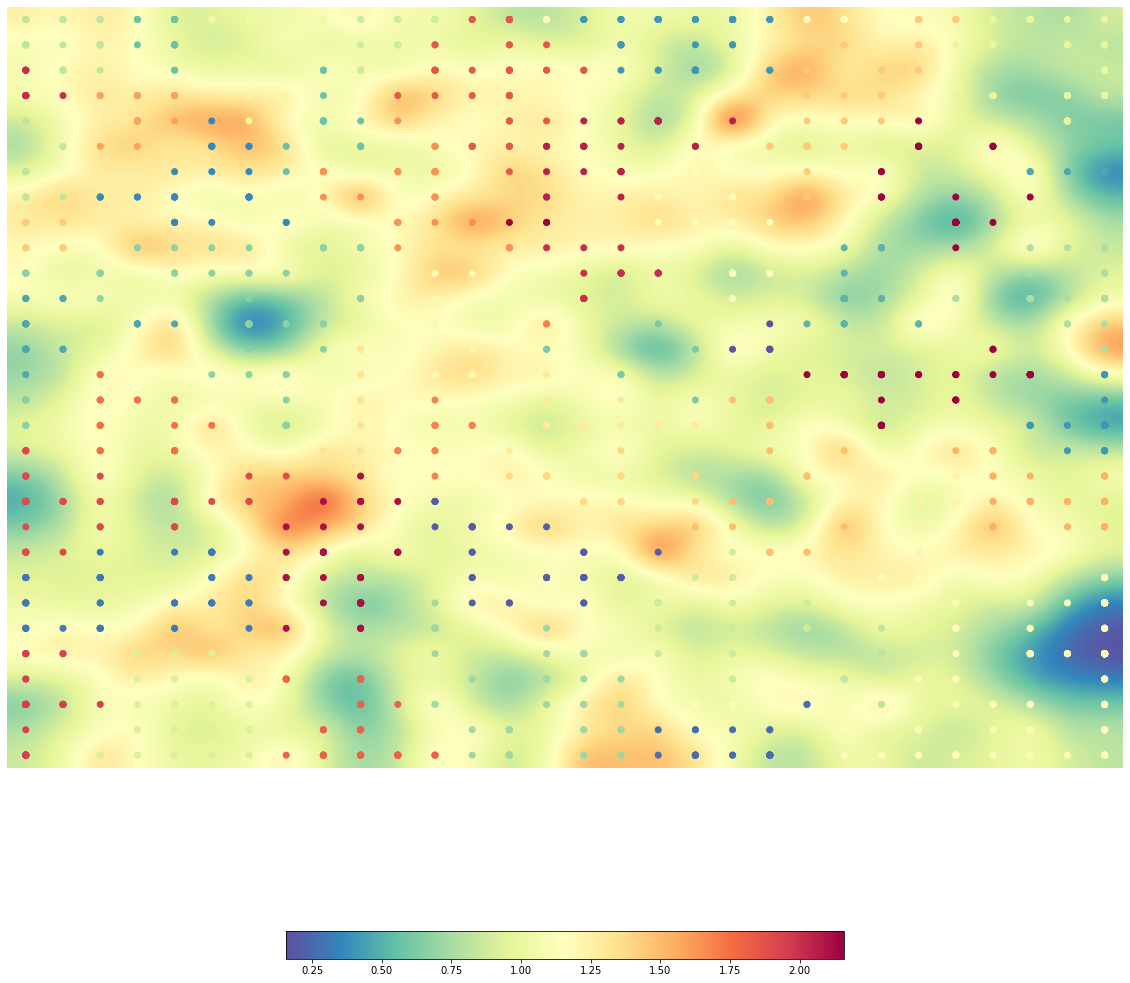

[[13 13 13  8  8 17 17 17 17 14 14 14 33 33 20  5  5  5  5  5  5 19 19 25
  25 25 16 16 16 16]
 [13 13 13  8  8  8 17 17 17 14 14 33 33 33 33  5  5  5  5  5  5 25 25 25
  25 16 16 16 16 16]
 [36 13 13 28  8 17 17 17  8 14 33 33 33 33 33 33  5  5  5  5  5 25 25 25
  25 16 16 16 16 16]
 [36 36 28 28 28 17 17 17  8  8 33 33 33 33 33 33 37 37  5  5  5 25 25 25
  25 16 16 16 16 16]
 [13 13 28 28 28  4 17  8  8  8 29 29 33 33 33 37 37 37 37 37 25 25 25 25
  39 16 16 16 16 16]
 [13 13 28 28  4  4  4  8  8  8 29 29 33 33 37 37 37 37 37 37 25 25 25 39
  39 39 39 39 16  6]
 [13 13  4  4  4  4  4  8 29 29 29 29 29 33 37 37 37 37 19 19 25 25 25 39
  39 39 39  6  6  6]
 [13 13  4  4  4  4  4  4 29 29 29 29 29 37 37 37 37 19 19 19 19 25 25 39
  39 39 39 39  6  6]
 [25 25  4  4  4  4  4  4 10 29 29 29 29 39 39 39 36 19 19 19 19 19  7  7
  39 39 39 39 12 12]
 [25 25 10 10 10 10 10 10 10 10 29 29 29 29 36 36 36 36 19 19 19  7  7  7
   7 39 39 12 12 12]
 [10 10 10 10 10 10 10 10 10 10 18 18 18 29 36 36 

In [ ]:
som_algorithm(som, 40)

### Γενικά συμπεράσματα για σχέση διάστασης χαρτών - λεπτομέρειας και αριθμό Κ-Μeans clusters

Η αύξηση τψν διαστάσεων του χάρτη παρατηρήσαμε ότι εντείνει τη λεπτομέρεια αλλά και την τραχύτητα των περιοχών.

Αρχικά στον 10 Χ 10 το μεγαλύτερο μέρος του χάρτη ήταν περιοχές ορίων (κόκκινες), με ελάχιστα clusters να έχουν σχηματιστεί. Αυξάνοντας τις διαστάσεις παρατηρήσαμε σταδιακά την αύξηση τη δημιουργία όλο και περισσότερων μπλε περιοχών (χαμηλής απίστασης) οι οποίες αντιπροσωπευαν ομάδες με κοινά χαρακτηριστικά. Παράλληλα η ένταση των ορίων μειωνόταν, καθώς υπήρχε χώρος στο χάρτη για να απεικονιστούν ομαλά οι μεταβάσεις μεταξύ κατηγοριών, που στην περίπτωση των ταινιών δεν είναι τόσο απότομες (μίξεις ειδών). Τέλος, η υπερβολική αύξηση των διαστάσεων του χάρτη, όπως ήταν λογικό, επέφερε τα αντιθετα αποτελέσματα, με τα όρια σταδιακά να χάνονται και τον αριθμό των μπλε περιοχών να πολλαπλασιάζεται. Όσον αφορά το επιθυη=μητό επίπεδο λεπτομέρειας επιλέξαμε το χάρτη 25 Χ 25 ως μία ικανοποιητική λύση από πλευράς λεπτομέρειας και ικανότητας διάκρισης. 

Οι απαιτήσεις του K-Means ως προς τον αριθμό τον clusters που απαιτούνται για αντιπροσωπευτική απεικόνιση του χάρτη είναι άμεση συνάρτηση των διαστάσεών του.

Συγκεκριμένα παρατηρήσαμε πως με κάθε αύξηση της διάστασης του χάρτη έπρεπε να αυξάνουμε ανάλογα και τον αριθμό των clusters ώστε το clustering να ανταποκρίνεται στις νέες μπλε περιοχές που δημιουργούνταν. Αρκετές φορές βέβαια συναντήσαμε ένα πρόβλημα καθώς αντί τα clusters να προσαρμόζονται σε περιοχές που οπτικά φαίνοντας διακριτές, αυτά προχωρούσαν σε διάσπαση είτε των ορίων μεταξύ τους είτε σε εσωτερική διάσπαση ομαλών μπλε περιοχών. Πάντοτε όμως παρά τη δυσκολία κατανόησης της κατάτμησης αυτής από την οπτικοποίηση του χάρτη, όταν προχωρούσαμε στην αναλυτική παρουσίαση των χαρακτηριστικών των clusters το clustering που είχε γίνει "έβγαζε νόημα" καθώς τα νέα clusters αντιπροσώπευαν μια ιδιαίτερη υποκατηγορία. Το μόνο θέμα εδώ λοιπόν ήταν πως δεν δινόταν προτεραιότητα στη διασπαση κάποιον μεγάλων και ανιμοιόμορφων clusters, χωρίς κάποια αντιπροσωπευτική κατηγορία, πράγμα που αποδίδουμε σε εσωτερικές ίσως ομοιότητες των ταινιών στην περιγραφή τους, οι οποίες δεν απεικονίζονται σε επίπεδο κατηγοριών ταινιών. 

### Ανάλυση τοπολογικών ιδιοτήτων με SOM

Στο βήμα αυτό θα χρησιμοποιήσουμε έναν **SOM** εκπαιδευμένο στο σύνολο του dataset, δηλαδή όλα τα 5000 δείγματα, όπου έχουμε χρησιμοποιήσει ως αλγόριθμο για το clustering τον **K-Means** με `n_clusters = 35`. Θεωρούμε πως στην συγκεκριμένη περίπτωση είχαμε ένα επιθυμητό επίπεδο λεπτομέρειας ως προς την τοπολογία και τις ιδιότητές της, το οποίο ερμηνεύουμε παρακάτω με της οπτικοποιήσεις που έχουμε κατασκευάσει.

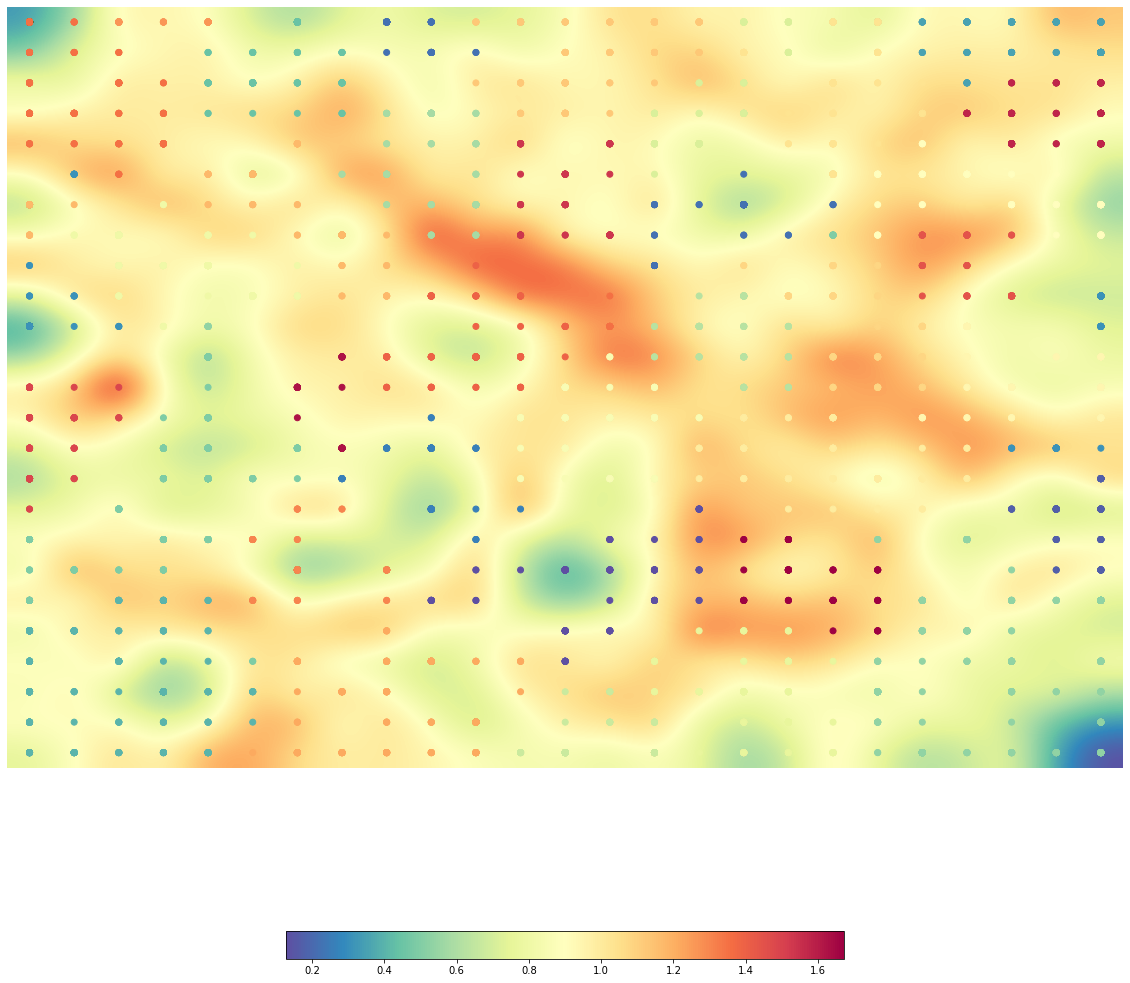

[[27 27 25 25 25  7  7  7  2  2 22 22 22 22 22 22 13 13 20 20  5  5  5  5
   5]
 [27 27 27 25  7  7  7  7  2  2  2 22 22 22 22 22 20 13 20 20  5  5  5  5
   5]
 [27 27 27 27  7  7  7  7  7 10 22 22 22 22 22 13 13 20 20 20 20  5 32 32
  32]
 [27 27 27 27  7  7  7  7 10 10 10 22 22 22 13 13 13 20 20 20 20 32 32 32
  32]
 [27 27 27 27 27 23 23  7 10 10 10 31 31 31 13 13 13 20 20 20 17 17 32 32
  32]
 [23  4 27 27 23 23 23 10 10 10 10 31 31 31 13 13  2  2 20 17 17 17 17 17
  17]
 [23 23 15 15 23 23 23 23 10 10 10 31 31 31  2  2  2  2  2 17 17 17 17 17
  17]
 [23 15 15 15 15 15 23 23 23 10 10 31 31 31  2  2  2  2  8 17 29 29 29 17
  17]
 [ 4 15 15 15 15 15 15 23 23 28 28 27 31  2  2  2 21 21 21 21 29 29 29 29
   4]
 [ 4  4 15 15 15 15 15 23 23 28 28 28 28 27  2 11 11 21 21 21 29 29 29 29
   4]
 [ 4  4  4 15  9 15 15 33 28 28 28 28 28 27 11 11 11 11 21 21 21 18 29  4
   4]
 [ 4  4  4  8  8  8 33 33 28 28 28 28 28 16 11 11 11 11 21 21 21 18 18 18
  18]
 [30 30 30  8  8  8 33 33 28 28 28 28 16

In [ ]:
som = joblib.load('som25_full.pkl')
som_algorithm(som,35)

In [ ]:
joblib.dump(som, 'som25_full_trained.pkl')

['som25_full_trained.pkl']

Από την πρώτη παραπάνω οπτικοποίηση του `U-Matrix` παρατηρούμε πως τα περισσότερα clusters διαχωρίζονται μεταξύ τους με όρια χαμηλής έντασης, πράγμα απόλυτα λογικό και επιθυμητό. 

Οι ταινίες δεν χωρίζονται σε αμοιβαίως αποκλειώμενες κατηγορίες αλλά αντιθέτως τα χαρακτηριστικά τους επιτρέπουν ομαλή μετάβαση μεταξύ κατηγριών, αλλά και μίξεις κάθε είδους, όπως θα παρατηρήσουμε σε λίγο.

In [ ]:
total_cluster_comp(35)

Cluster ID  ...                                   Top 3 Categories
0            0  ...  [("Drama", 143), ("Romance Film", 143), ("Acti...
1            1  ...  [("Crime Fiction", 93), ("Drama", 93), ("Actio...
2            2  ...  [("Thriller", 124), ("Drama", 60), ("Psycholog...
3            3  ...  [("Romance Film", 88), ("Comedy", 35), ("Music...
4            4  ...  [("Short Film", 161), ("Animation", 54), ("Dra...
5            5  ...  [("Action/Adventure", 145), ("Action", 114), (...
6            6  ...  [("Horror", 353), ("Thriller", 83), ("Science ...
7            7  ...   [("Comedy", 112), ("Drama", 111), ("Indie", 48)]
8            8  ...  [("Japanese Movies", 52), ("Science Fiction", ...
9            9  ...  [("Drama", 678), ("Black-and-white", 58), ("In...
10          10  ...  [("Thriller", 78), ("Mystery", 73), ("Drama", ...
11          11  ...  [("Family Film", 65), ("Comedy", 52), ("Childr...
12          12  ...  [("World cinema", 80), ("Bollywood", 77), ("Mu...
13          13  ...  [("Crime Fiction", 88), ("Thriller", 82), ("Ac...
14          14  ...  [("World cinema", 171), ("Drama", 169), ("War ...
15          15  ...  [("Silent film", 97), ("Black-and-white", 93),...
16          16  ...  [("Drama", 103), ("Comedy", 102), ("Romance Fi...
17          17  ...  [("Action", 123), ("Adventure", 41), ("Science...
18          18  ...  [("Animation", 120), ("Family Film", 106), ("S...
19          19  ...  [("Drama", 90), ("Family Film", 88), ("Comedy"...
20          20  ...  [("Thriller", 145), ("Action", 144), ("Action/...
21          21  ...  [("Family Film", 73), ("Adventure", 68), ("Fan...
22          22  ...  [("Drama", 137), ("Thriller", 137), ("Crime Fi...
23          23  ...  [("Black-and-white", 145), ("Comedy", 112), ("...
24          24  ...  [("Drama", 216), ("Romantic drama", 215), ("Ro...
25          25  ...  [("Comedy", 42), ("World cinema", 26), ("Comed...
26          26  ...  [("Comedy film", 93), ("Romance Film", 20), ("...
27          27  ...   [("Comedy", 281), ("Parody", 53), ("Indie", 33)]
28          28  ...  [("Romance Film", 120), ("Romantic comedy", 12...
29          29  ...  [("Animation", 54), ("Anime", 21), ("Japanese ...
30          30  ...  [("Documentary", 135), ("Biography", 19), ("Cu...
31          31  ...  [("Thriller", 68), ("Crime Thriller", 57), ("M...
32          32  ...  [("Drama", 112), ("Action", 108), ("Action/Adv...
33          33  ...  [("Comedy", 24), ("Romantic comedy", 23), ("Mu...
34          34  ...  [("Drama", 59), ("Period piece", 44), ("Biopic...

[35 rows x 4 columns]

Στο παραπάνω κελί καλείται η συνάρτηση οπτικοποίησης `total_cluster_comp` με σκοπό να αναλύσουμε τις ιδιότητες κάθε cluster του SOM. Παρατηρούμε τα εξής:

Ως προς την αναλογία **Συχνότητα εμφάνισης εισόδου - Νευρώνες που Αντιστοιχούν στο cluster** : Παρατηρείται να τηρείται γενικά ο κανόνας ότι οι μεγαλύτερες σε συχνότητα είσοδοι απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Η σχέση όμως δεν είναι εντελώς αναλογική αφού η κατηγορία για `cluster_id = 9` με **678 δείγματα** στο χώρο εισόδου αναπαρίσταται με **31 νευρώνες** την ίδια στιγμή που η κατηγορία που αντιστοιχεί σε `cluster_id = 6` με **353 δείγματα** αναπαρίσταται με **29 νευρώνες**. Επίσης υπάρχουν και περιπτώσεις που δεν τηρείται καν η διάταξη στη σχέση εισόδου-νευρώνων, το οποίο πιθανόν οφείλεται στην ιδιαιτερότητα των δεδομένων.

Ως προς το περιεχόμενο των κυρίαρχων κατηγοριών κάθε cluster παρατηρούμε πως γενικά σα δομή η πρώτη κατηγορία συνήθως αποτελεί τη γενική κατηγορία του cluster και οι υπόλοιπες δείχνουν την κατεύθυνση προς την οποία κινείται το cluster. Γι' αυτό παρατηρείται συχνά η ύπραξη κοινής πρώτης κατηγορίας μεταξύ διαφορετικών clusters. Οι υπόλοιπες κατηγορίες συνήθως διαφέρουν αρκετά και άρα οδηγούν στη διάκριση των clusters. 


Θεωρούμε πως πολύ σημαντικά clusters για μελέτη είναι τα παρακάτω.

Το cluster 9 με 678 samples τα οποία όλα ανήκουν στην κατηγορία "Drama". Δεδομένης της αντοχής αυτού του cluster στο sub-clustering μπορούμε να προσδιορίσουμε ίσως μέσα από μελέτη των χαρακτηριστικών των ταινιών που ανήκουν σε αυτό κάποια πολύ έντονα χαρακτηριστικά των ταινιών "Drama" τα οποία προκαλούν τη διάκρισή τους από τα άλλα είδη.

Ιδιαίτερη περίπτωση αποτελεί το cluster με `"cluster_id = 8"`, το οποίο αν και περιέχει 321 δείγματα, δεν έχει καμία κατηγορία με πάνω από 50 δείγματα. Παρακάτω παρουσιάζονται όλες οι κατηγορίες με τη συχνότητα εμφάνισής τους.

In [ ]:
[('"Japanese Movies"', 52), ('"Science Fiction"', 42), ('"Silent film"', 42), ('"Adventure"', 26), ('"Chinese Movies"', 22), ('"Crime Fiction"', 22), ('"World cinema"', 22), ('"Musical"', 21), ('"War film"', 20), ('"Action/Adventure"', 15), ('"Mystery"', 15), ('"Western"', 15), ('"Family Film"', 14), ('"Fantasy"', 14), ('"Bollywood"', 12), ('"Martial Arts Film"', 12), ('"Children\\s/Family"', 11), ('"Comedy-drama"', 9), ('"Cult"', 7), ('"Anime"', 6), ('"Television movie"', 6), ('"Historical drama"', 5), ('"Costume drama"', 4), ('"Film noir"', 4), ('"Monster"', 4), ('"Art film"', 3), ('"Black comedy"', 3), ('"Children\\s Fantasy"', 3), ('"Children\\s"', 3), ('"Disaster"', 3), ('"Family-Oriented Adventure"', 3), ('"Filipino Movies"', 3), ('"Historical fiction"', 3), ('"Indie"', 3), ('"Suspense"', 3), ('"Time travel"', 3), ('"Action"', 2), ('"Animated cartoon"', 2), ('"Biographical film"', 2), ('"Crime Drama"', 2), ('"Experimental film"', 2), ('"Family Drama"', 2), ('"Horror"', 2), ('"Music"', 2), ('"Superhero movie"', 2), ('"Thriller"', 2), ('"Alien Film"', 1), ('"Apocalyptic and post-apocalyptic fiction"', 1), ('"Avant-garde"', 1), ('"Biopic feature"', 1), ('"Black-and-white"', 1), ('"Buddy film"', 1), ('"Children\\s Entertainment"', 1), ('"Christian film"', 1), ('"Christmas movie"', 1), ('"Comedy"', 1), ('"Crime Thriller"', 1), ('"Culture & Society"', 1), ('"Detective fiction"', 1), ('"Detective"', 1), ('"Documentary"', 1), ('"Dogme 95"', 1), ('"Epic"', 1), ('"Fantasy Adventure"', 1), ('"Heaven-Can-Wait Fantasies"', 1), ('"Historical Epic"', 1), ('"History"', 1), ('"Kitchen sink realism"', 1), ('"Language & Literature"', 1), ('"Melodrama"', 1), ('"Monster movie"', 1), ('"Musical Drama"', 1), ('"Musical comedy"', 1), ('"Operetta"', 1), ('"Pre-Code"', 1), ('"Prison"', 1), ('"Psychological thriller"', 1), ('"Punk rock"', 1), ('"Religious Film"', 1), ('"Romantic comedy"', 1), ('"Satire"', 1), ('"Slasher"', 1), ('"Sports"', 1), ('"Steampunk"', 1), ('"Superhero"', 1), ('"Surrealism"', 1), ('"Tamil cinema"', 1), ('"Teen"', 1), ('"Wuxia"', 1)]

[('"Japanese Movies"', 52),
 ('"Science Fiction"', 42),
 ('"Silent film"', 42),
 ('"Adventure"', 26),
 ('"Chinese Movies"', 22),
 ('"Crime Fiction"', 22),
 ('"World cinema"', 22),
 ('"Musical"', 21),
 ('"War film"', 20),
 ('"Action/Adventure"', 15),
 ('"Mystery"', 15),
 ('"Western"', 15),
 ('"Family Film"', 14),
 ('"Fantasy"', 14),
 ('"Bollywood"', 12),
 ('"Martial Arts Film"', 12),
 ('"Children\\s/Family"', 11),
 ('"Comedy-drama"', 9),
 ('"Cult"', 7),
 ('"Anime"', 6),
 ('"Television movie"', 6),
 ('"Historical drama"', 5),
 ('"Costume drama"', 4),
 ('"Film noir"', 4),
 ('"Monster"', 4),
 ('"Art film"', 3),
 ('"Black comedy"', 3),
 ('"Children\\s Fantasy"', 3),
 ('"Children\\s"', 3),
 ('"Disaster"', 3),
 ('"Family-Oriented Adventure"', 3),
 ('"Filipino Movies"', 3),
 ('"Historical fiction"', 3),
 ('"Indie"', 3),
 ('"Suspense"', 3),
 ('"Time travel"', 3),
 ('"Action"', 2),
 ('"Animated cartoon"', 2),
 ('"Biographical film"', 2),
 ('"Crime Drama"', 2),
 ('"Experimental film"', 2),
 ('"Fa

Αν και αρχικά δε βγάζει νόημα η δημιουργία ενός τόσο μεγάλου cluster χωρίς ιδαίτερη συνλαφεια μεταξύ των κατηγοριών, μπορούμε να παρατηρήσουμε πως οι κυριότερες απευθύνονται στα "αγαπημένα" είδη διάφορων λαών. Βλέπουμε δηλαδή, `"Chinese Movies", "Japanese Movies", "World Cinema", "Western", "Bollywood"` κλπ.
Αυτός είναι ίσως και ο λόγος δημιουργίας του cluster από τον αλγόριθμο. Εδώ είναι σημαντικό να αναφέρουμε πως ακόμα και όταν αυξάναμε τον αριθμό των clusters το συγκεκριμένο cluster δεν έδειχνε κάποια τάση να διασπαστεί σε επιμέρους clusters με πιο συγκεκριμένο περιεχόμενο. Το συγκεκριμένο cluster λοιπόν έχει ιδιαίτερη αξία για περαιτέρω έρευνα, καθώς αναλύοντας το περιεχόμενο των ταινιών του μπορούμε να προσδιορίσουμε ομοιότητες που κανουν τα "εθνικά" είδη περισσότερα "παγκόσμια" από όσο νομίζουμε.

Παρακάτω απεικονίζουμε τα clusters σε μορφή γράφου γειτνίασης για εξαγωγή επιιπλέον συμπερασμάτων.

In [ ]:
test = total_cluster_comp(35)
top3 = test['Top 3 Categories'].to_list()
top3final = []
for i in range(len(top3)):
    top3final.append(top3[i][0][0]+','+top3[i][1][0]+','+top3[i][2][0])
top3 = top3final
print(top3)

['"Drama","Romance Film","Action"', '"Crime Fiction","Drama","Action"', '"Thriller","Drama","Psychological thriller"', '"Romance Film","Comedy","Musical"', '"Short Film","Animation","Drama"', '"Action/Adventure","Action","Comedy"', '"Horror","Thriller","Science Fiction"', '"Comedy","Drama","Indie"', '"Japanese Movies","Science Fiction","Silent film"', '"Drama","Black-and-white","Indie"', '"Thriller","Mystery","Drama"', '"Family Film","Comedy","Children\\s/Family"', '"World cinema","Bollywood","Musical"', '"Crime Fiction","Thriller","Action"', '"World cinema","Drama","War film"', '"Silent film","Black-and-white","Indie"', '"Drama","Comedy","Romance Film"', '"Action","Adventure","Science Fiction"', '"Animation","Family Film","Short Film"', '"Drama","Family Film","Comedy"', '"Thriller","Action","Action/Adventure"', '"Family Film","Adventure","Fantasy"', '"Drama","Thriller","Crime Fiction"', '"Black-and-white","Comedy","Short Film"', '"Drama","Romantic drama","Romance Film"', '"Comedy","Wo

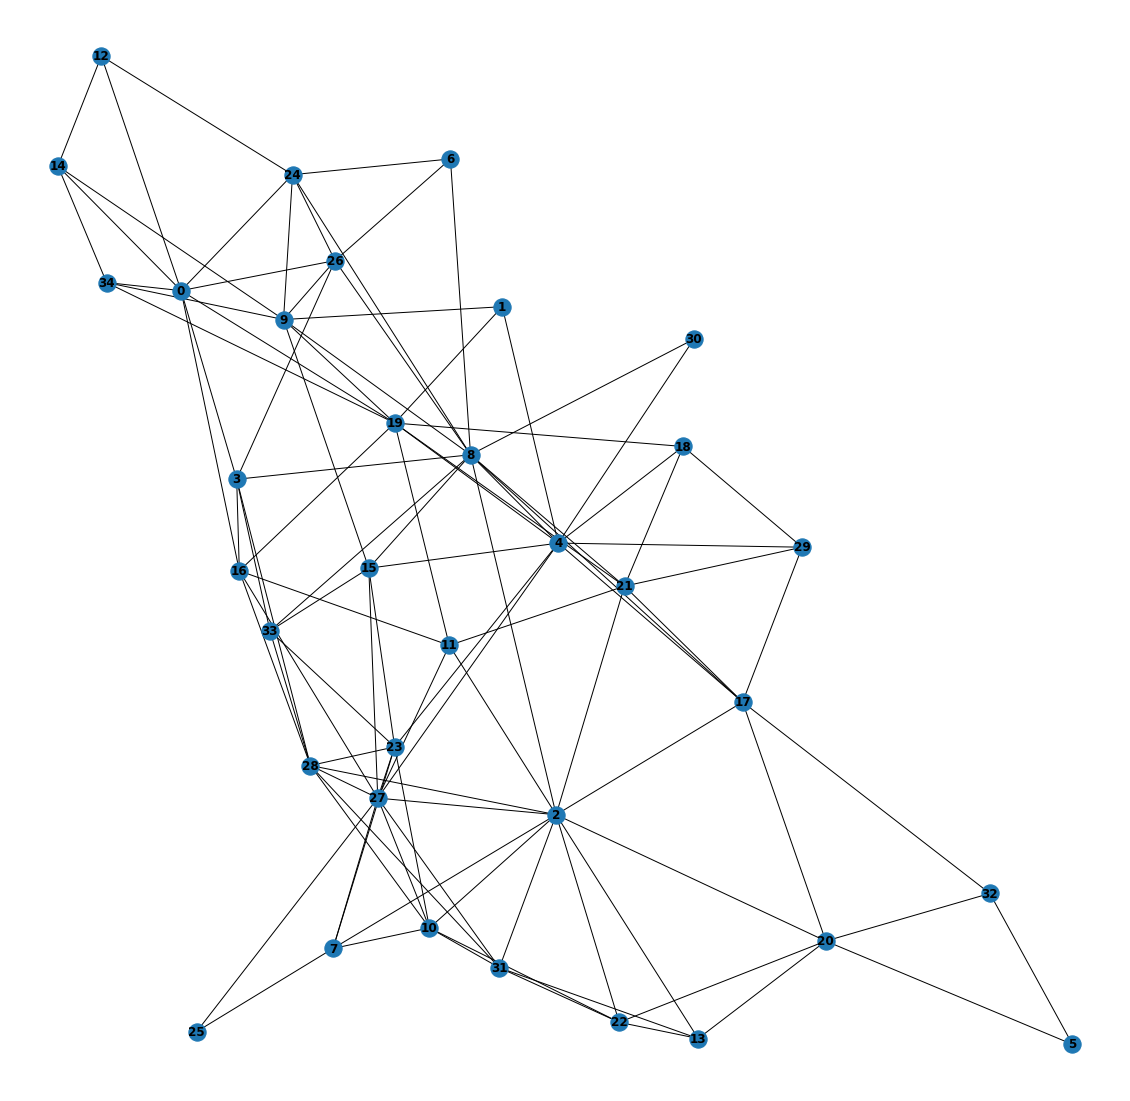

In [ ]:
plot_topology0(35)

In [ ]:
plot_topology(35,top3)

**ΣΕ ΠΕΡΙΠΤΩΣΗ ΠΟΥ ΔΕΝ ΕΜΦΑΝΙΖΕΤΑΙ Ο ΔΙΑΔΡΑΣΤΙΚΟΣ ΓΡΑΦΟΣ ΠΟΥ ΒΡΙΣΚΕΤΑΙ ΣΤΟ ΑΚΡΙΒΩΣ ΠΑΡΑΠΑΝΩ ΚΕΛΙ, ΕΚΤΕΛΕΣΤΕ ΤΟ ΠΑΡΑΚΑΤΩ ΚΕΛΙ ΓΙΑ ΝΑ ΤΟΝ ΕΙΣΑΓΕΤΕ ΜΕ HTML**

Το παρακάτω κελί δουλεύει επιτυχώς σε `Jupyter`, όχι όμως σε `Colab`

In [ ]:
from IPython.display import IFrame
IFrame(src='./plot_25_35.html', width=1200, height=600)

Από το γράφο μπορούμε να παρατηρήσουμε τις "γειτονιές" του χάρτη. 

Χαρακτηριστικά παραδείγματα με τα οποία θα ασχοληθούμε είναι το `cluster = 6` με κύριες κατηγορίες τις `["Horror","Thriller","Science Fiction"]`
και το `cluster = 11` με κύριες κατηγορίες τις κατηγορίες `["Family Film","Comedy","Childrens/Family"]`. Τα δύο αυτά, εντελώς ομολογουμένων αντίθετα, clusters χωρίζουν σε οποιδήποτε μονοπάτι στο γράφο τουλάχιστον δύο κόμβοι. Αντίστοιχα αποτελέσματα μπορούν να εξαχθούν και από το `U-matrix`. 

Επιπλέον, μια γενική κατηγορία, συνήθως γειτονέυει με τις υποκατηγορίες της. Συγκεκριμένα, το `cluster = 9` που αναπαριστά τη γενική κατηγορία `"Drama"` συνορεύει με επιμέρους κατηγορές δραμάτων που αντιπροσωπεύονται από τους clusters : `[16, 19, 1, 34, 24]`

Παραδόξως βέβαια γειτονικές είναι και οι κατηγορίες 28 και 10 που αντιπροσωπεύουν θρίλερ μυστηρίου και ρομαντικές κομεντί αντίστοιχα. Αν και δεν φαίνεται να υπάρχει κάποια προφανής σύνδεση μεταξύ των κατηγοριών, εικάζουμε πως η σύνδεση αυτή οφείλεται σε ομοιότητες ως προς το περιεχόμενο και κυρίως ως προς το background τοο οποίο περιγράφεται κατά τη σύνοψη. 

Ακολούθως οι `clusters 2 και 27` συνορεύουν ενώ οι κατηγορίες τους φαίνονται αρχικά εντελώς διαφορετικές. Ο 2 αντιπροσωπεύει `["Thriller","Drama","Psychological Thriller"]` και ο 27 `["Comedy","Parody","Indie"]` κατηγορίες τρομερά διαφορετικές. Παρ' όλα αυτά γνωρίζοντας την ύπαρξη ταινιών που σατιρίζουν τα blockbuster ανεξαρτήτων κατηγορίας, [π.χ. "Scary Movies" σατιρίζει "Scream"] , θεωρούμε πως οι παροδίες αποτελούν "πασπαρτού" που γεφυρώνει τις κατά τα άλλα άσχετες αυτές κατηγορίες. 

# Τελική παράδοση άσκησης

- Θα παραδώσετε στο eclass το παρόν notebook επεξεργασμένο ή ένα νέο με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στον τελικό χάρτη με τα κελιά ορατά που θα παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.
- Στο **zip** που θα παραδώσετε πρέπει να βρίσκονται **2 αρχεία (το .ipynb και το .py του notebook σας)**.

<table>
  <tr><td align="center">
    <font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα!</font>
</td>
  </tr>
</table>